# 📊 Análisis Estadístico de Métricas de Calidad de Código

## 🎯 Objetivo Principal

Desarrollar un análisis estadístico riguroso de las **métricas agregadas de calidad de código** para determinar si existe una **mejora estadísticamente significativa** entre **Programación Aplicada I (AP1)** y **Programación Aplicada II (AP2)**, identificando patrones, factores de influencia y recomendaciones pedagógicas.

## 📋 Enfoque de Análisis

- ✅ **Métricas agregadas de SonarCloud**: bugs, vulnerabilidades, code smells, deuda técnica, complejidad
- ✅ **60 estudiantes** con proyectos de programación en AP1 y AP2
- ✅ **Análisis estadístico inferencial**: pruebas de hipótesis, tamaños de efecto
- ✅ **Comparaciones pareadas**: evolución individual de estudiantes
- ✅ **Visualizaciones estadísticas**: distribuciones, correlaciones, efectos

## 📝 Nota sobre el Análisis de Issues

> El análisis **detallado de issues individuales** (tipos, severidades, reglas específicas, ubicaciones) se realiza en el notebook separado:
> 
> 📂 **`4. Analisis Avanzado Issues SonarCloud.ipynb`**
> 
> Este notebook se enfoca en las **métricas consolidadas** para análisis estadístico comparativo.

## 🔬 Metodología

1. **Análisis Exploratorio de Datos (EDA)** - Métricas agregadas
2. **Pruebas de Hipótesis Múltiples** - Comparaciones AP1 vs AP2
3. **Análisis Multivariado** - Patrones en métricas de calidad
4. **Visualizaciones Estadísticas** - Distribuciones y efectos
5. **Interpretación Pedagógica** - Recomendaciones curriculares

---
*Análisis desarrollado para investigación en calidad de software educativa - Tesis Aplicada 2*

## 1. 📦 Instalación de Dependencias

Instalamos todas las librerías necesarias para el análisis estadístico avanzado.

In [1]:
# Instalación de librerías para análisis estadístico avanzado
import subprocess
import sys

def install_package(package):
    """Instala un paquete usando pip si no está disponible"""
    try:
        __import__(package.split('==')[0])
        print(f"✅ {package} ya está instalado")
    except ImportError:
        print(f"📦 Instalando {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} instalado correctamente")

# Lista de paquetes necesarios
packages = [
    "pandas>=1.5.0",
    "numpy>=1.21.0", 
    "matplotlib>=3.5.0",
    "seaborn>=0.11.0",
    "plotly>=5.0.0",
    "scipy>=1.9.0",
    "scikit-learn>=1.1.0",
    "statsmodels>=0.13.0",
    "pingouin>=0.5.0",  # Para análisis estadísticos avanzados
    "kaleido",  # Para exportar gráficos de plotly
    "jupyter-dash",  # Para dashboards interactivos
    "umap-learn",  # Para reducción de dimensionalidad
    "yellowbrick",  # Para visualizaciones de ML
    "missingno"  # Para análisis de datos faltantes
]

print("🚀 Iniciando instalación de dependencias...")
for package in packages:
    install_package(package)

print("\n🎉 Todas las dependencias han sido instaladas correctamente!")
print("📋 Reinicia el kernel si es necesario para cargar las nuevas librerías.")

🚀 Iniciando instalación de dependencias...
📦 Instalando pandas>=1.5.0...
✅ pandas>=1.5.0 instalado correctamente
📦 Instalando numpy>=1.21.0...
✅ pandas>=1.5.0 instalado correctamente
📦 Instalando numpy>=1.21.0...
✅ numpy>=1.21.0 instalado correctamente
📦 Instalando matplotlib>=3.5.0...
✅ numpy>=1.21.0 instalado correctamente
📦 Instalando matplotlib>=3.5.0...
✅ matplotlib>=3.5.0 instalado correctamente
📦 Instalando seaborn>=0.11.0...
✅ matplotlib>=3.5.0 instalado correctamente
📦 Instalando seaborn>=0.11.0...
✅ seaborn>=0.11.0 instalado correctamente
📦 Instalando plotly>=5.0.0...
✅ seaborn>=0.11.0 instalado correctamente
📦 Instalando plotly>=5.0.0...
✅ plotly>=5.0.0 instalado correctamente
📦 Instalando scipy>=1.9.0...
✅ plotly>=5.0.0 instalado correctamente
📦 Instalando scipy>=1.9.0...
✅ scipy>=1.9.0 instalado correctamente
📦 Instalando scikit-learn>=1.1.0...
✅ scipy>=1.9.0 instalado correctamente
📦 Instalando scikit-learn>=1.1.0...
✅ scikit-learn>=1.1.0 instalado correctamente
📦 Instala

## 2. 📚 Importación de Librerías

Importamos todas las librerías necesarias para el análisis estadístico, visualización y machine learning.

In [2]:
# Librerías fundamentales
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Análisis estadístico
import scipy.stats as stats
from scipy.stats import shapiro, kstest, mannwhitneyu, wilcoxon, ttest_rel, ttest_ind
from scipy.stats import pearsonr, spearmanr, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.multivariate.manova import MANOVA
import pingouin as pg

# Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
import umap

# Visualización de ML (con manejo de errores)
try:
    from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
    from yellowbrick.features import RadViz, ParallelCoordinates
    YELLOWBRICK_AVAILABLE = True
    print("✅ Yellowbrick importado correctamente")
except ImportError as e:
    print(f"⚠️ Yellowbrick no disponible: {str(e)}")
    print("   Continuaremos con visualizaciones alternativas usando matplotlib/seaborn")
    YELLOWBRICK_AVAILABLE = False

# Utilidades
import os
from datetime import datetime
import json
import missingno as msno
from itertools import combinations
from functools import partial

# Configuraciones de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuraciones de plotly
import plotly.io as pio
pio.templates.default = "plotly_white"

# Colores personalizados para visualizaciones
COLORS = {
    'AP1': '#FF6B6B',    # Rojo suave
    'AP2': '#4ECDC4',    # Verde azulado
    'male': '#3498DB',   # Azul
    'female': '#E74C3C', # Rojo
    'primary': '#2C3E50',
    'secondary': '#95A5A6',
    'success': '#27AE60',
    'warning': '#F39C12',
    'danger': '#E74C3C'
}

print("📚 Librerías importadas correctamente")
print(f"🐼 Pandas: {pd.__version__}")
print(f"🔢 NumPy: {np.__version__}")
print(f"📊 Matplotlib: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn: {sns.__version__}")
print(f"🎯 Yellowbrick: {'Disponible' if YELLOWBRICK_AVAILABLE else 'No disponible'}")
print("✅ Configuraciones aplicadas")

# Configurar semilla para reproducibilidad
np.random.seed(42)
import random
random.seed(42)

✅ Yellowbrick importado correctamente
📚 Librerías importadas correctamente
🐼 Pandas: 2.3.1
🔢 NumPy: 2.2.6
📊 Matplotlib: 3.10.5
🎨 Seaborn: 0.13.2
🎯 Yellowbrick: Disponible
✅ Configuraciones aplicadas


In [3]:
# Funciones alternativas cuando yellowbrick no está disponible
def alternative_elbow_plot(data, max_k=10, random_state=42):
    """Implementación alternativa del método del codo para K-means"""
    if len(data) < max_k:
        max_k = len(data) - 1
    
    inertias = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'bo-')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para Selección de K')
    plt.grid(True, alpha=0.3)
    
    # Calcular y mostrar el codo aproximado
    if len(inertias) > 2:
        # Diferencias de segundo orden para encontrar el codo
        differences = np.diff(inertias, 2)
        if len(differences) > 0:
            elbow_idx = np.argmax(differences) + 2
            plt.axvline(x=elbow_idx, color='red', linestyle='--', 
                       label=f'Codo aproximado: k={elbow_idx}')
            plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return inertias

def alternative_silhouette_plot(data, n_clusters, random_state=42):
    """Implementación alternativa del análisis de silueta"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    
    # Calcular puntuaciones de silueta para cada muestra
    sample_silhouette_values = silhouette_score(data, cluster_labels, 
                                               metric='euclidean')
    
    print(f"📊 Puntuación de silueta promedio: {silhouette_avg:.3f}")
    print(f"📊 Número de clusters: {n_clusters}")
    
    return silhouette_avg, cluster_labels

def alternative_parallel_coordinates(data, target_col, feature_cols, max_features=10):
    """Implementación alternativa de coordenadas paralelas"""
    # Limitar número de características si es necesario
    if len(feature_cols) > max_features:
        feature_cols = feature_cols[:max_features]
        print(f"⚠️ Limitando a {max_features} características para mejor visualización")
    
    # Crear el gráfico
    plt.figure(figsize=(15, 8))
    
    # Normalizar los datos para mejor visualización
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data[feature_cols])
    normalized_df = pd.DataFrame(normalized_data, columns=feature_cols)
    normalized_df[target_col] = data[target_col].values
    
    # Crear coordenadas paralelas
    for target_value in normalized_df[target_col].unique():
        subset = normalized_df[normalized_df[target_col] == target_value]
        
        for idx, row in subset.iterrows():
            values = row[feature_cols].values
            plt.plot(range(len(feature_cols)), values, alpha=0.6, 
                    label=target_value if idx == subset.index[0] else "")
    
    plt.xticks(range(len(feature_cols)), feature_cols, rotation=45, ha='right')
    plt.ylabel('Valores Normalizados')
    plt.title('Coordenadas Paralelas (Implementación Alternativa)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("🔧 Funciones alternativas de visualización cargadas")
print("   Estas funciones se usarán si yellowbrick no está disponible")

🔧 Funciones alternativas de visualización cargadas
   Estas funciones se usarán si yellowbrick no está disponible


## 3. 📊 Carga y Preparación de Datos

Cargamos el dataset de métricas agregadas de SonarCloud para el análisis estadístico de calidad de código.

In [ ]:
# Función para cargar datos con manejo de errores
def load_data_safely(file_path, description="archivo"):
    """Carga un archivo CSV con manejo seguro de errores"""
    try:
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, encoding='utf-8-sig')
            print(f"✅ {description} cargado: {file_path}")
            print(f"   📊 Dimensiones: {df.shape}")
            return df
        else:
            print(f"❌ Archivo no encontrado: {file_path}")
            return pd.DataFrame()
    except Exception as e:
        print(f"❌ Error cargando {description}: {str(e)}")
        return pd.DataFrame()

def download_data_from_github(url, description="archivo"):
    """Descarga datos directamente desde GitHub con manejo de errores"""
    try:
        print(f"🌐 Descargando {description} desde GitHub...")
        df = pd.read_csv(url, encoding='utf-8-sig')
        print(f"✅ {description} descargado exitosamente")
        print(f"   📊 Dimensiones: {df.shape}")
        return df
    except Exception as e:
        print(f"❌ Error descargando {description}: {str(e)}")
        return pd.DataFrame()

# Cargar dataset principal de métricas desde GitHub
print("🔄 Cargando dataset de métricas de calidad...")
github_url = "https://raw.githubusercontent.com/TesisEnel/Recopilacion_Datos_CalidadCodigo/refs/heads/main/Estudiantes_2023-2024_con_metricas_sonarcloud.csv"

# Intentar descargar desde GitHub primero
df_metricas = download_data_from_github(
    github_url,
    'Dataset de métricas de SonarCloud'
)

# Verificar carga exitosa
if not df_metricas.empty:
    print(f"\n📋 Dataset de métricas:")
    print(f"   👥 Estudiantes: {df_metricas['Id'].nunique()}")
    print(f"   📊 Columnas: {len(df_metricas.columns)}")
    print(f"   📅 Semestres: {df_metricas['Semestre'].unique().tolist()}")
    
    # Mostrar primeras columnas de métricas
    print(f"\n🔍 Primeras 5 filas de métricas:")
    display(df_metricas[['Id', 'Estudiante', 'Sexo', 'Semestre', 'bugs_AP1', 'bugs_AP2', 
                        'code_smells_AP1', 'code_smells_AP2', 'ncloc_AP1', 'ncloc_AP2']].head())

else:
    print("❌ No se pudo cargar el dataset de métricas")

print(f"\n✅ Carga de datos completada")
print(f"🌐 Fuente de datos: {'GitHub (actualizada)' if not df_metricas.empty else 'Local/Error'}")


🔄 Cargando datasets...
🌐 Descargando Dataset de métricas de SonarCloud desde GitHub...
✅ Dataset de métricas de SonarCloud descargado exitosamente
   📊 Dimensiones: (60, 41)
⚠️ No se encontraron archivos de issues. Se procederá solo con métricas.

📋 Dataset de métricas:
   👥 Estudiantes: 60
   📊 Columnas: 41
   📅 Semestres: ['2024-01', '2023-03', '2024-02', '2024-03', '2023-01', '2023-02']

🔍 Primeras 5 filas de métricas:
✅ Dataset de métricas de SonarCloud descargado exitosamente
   📊 Dimensiones: (60, 41)
⚠️ No se encontraron archivos de issues. Se procederá solo con métricas.

📋 Dataset de métricas:
   👥 Estudiantes: 60
   📊 Columnas: 41
   📅 Semestres: ['2024-01', '2023-03', '2024-02', '2024-03', '2023-01', '2023-02']

🔍 Primeras 5 filas de métricas:


,Id,Estudiante,Sexo,Semestre,bugs_AP1,bugs_AP2,code_smells_AP1,code_smells_AP2,ncloc_AP1,ncloc_AP2
0,1,Aaron Eliezer Hernández García,1,2024-01,8,2,239,238,6773,14674
1,2,Abraham El Hage Jreij,1,2023-03,0,0,47,37,5857,4075
2,3,Adiel Luis García Rosa,1,2024-02,1,0,55,40,2250,5736
3,4,Alaina Garcia Salazar,2,2024-03,1,0,33,116,4228,11268
4,5,Albert Luis Delgado Maria,1,2023-01,14,0,58,28,1536,2781


⚠️ No se cargaron datos de issues - se continuará con métricas únicamente

✅ Carga de datos completada
📊 Total de datasets cargados: 1 + 0
🌐 Fuente de datos: GitHub (actualizada)


### 3.1 Preprocesamiento y Limpieza de Datos

Preparamos los datos para el análisis estadístico, incluyendo limpieza, transformaciones y creación de variables derivadas.

In [5]:
if not df_metricas.empty:
    print("🔄 Iniciando preprocesamiento de datos...")
    
    # Crear una copia para trabajar
    df = df_metricas.copy()
    
    # 1. LIMPIEZA BÁSICA
    print("\n1️⃣ Limpieza básica de datos")
    
    # Renombrar columnas para mayor claridad
    df['estudiante_id'] = df['Id']
    df['nombre'] = df['Estudiante']
    df['genero'] = df['Sexo'].map({1: 'Masculino', 2: 'Femenino'})
    df['semestre'] = df['Semestre']
    
    print(f"   ✅ Renombrado de columnas completado")
    print(f"   👥 Distribución por género: {df['genero'].value_counts().to_dict()}")
    print(f"   📅 Distribución por semestre: {df['semestre'].value_counts().to_dict()}")
    
    # 2. IDENTIFICAR MÉTRICAS DE CALIDAD
    print("\n2️⃣ Identificación de métricas de calidad")
    
    # Métricas principales de SonarCloud
    metricas_calidad = {
        'bugs': ['bugs_AP1', 'bugs_AP2'],
        'vulnerabilities': ['vulnerabilities_AP1', 'vulnerabilities_AP2'],
        'security_hotspots': ['security_hotspots_AP1', 'security_hotspots_AP2'],
        'code_smells': ['code_smells_AP1', 'code_smells_AP2'],
        'technical_debt': ['technical_debt_AP1', 'technical_debt_AP2'],
        'complexity': ['complexity_AP1', 'complexity_AP2'],
        'cognitive_complexity': ['cognitive_complexity_AP1', 'cognitive_complexity_AP2'],
        'ncloc': ['ncloc_AP1', 'ncloc_AP2'],
        'duplicated_lines_density': ['duplicated_lines_density_AP1', 'duplicated_lines_density_AP2'],
        'coverage': ['coverage_AP1', 'coverage_AP2'],
        'comment_lines_density': ['comment_lines_density_AP1', 'comment_lines_density_AP2'],
        'open_issues': ['open_issues_AP1', 'open_issues_AP2']
    }
    
    # Verificar qué métricas están disponibles
    metricas_disponibles = {}
    for metrica, columnas in metricas_calidad.items():
        cols_existentes = [col for col in columnas if col in df.columns]
        if cols_existentes:
            metricas_disponibles[metrica] = cols_existentes
            print(f"   ✅ {metrica}: {len(cols_existentes)} columnas disponibles")
        else:
            print(f"   ❌ {metrica}: No disponible")
    
    # 3. MANEJO DE DATOS FALTANTES
    print(f"\n3️⃣ Análisis de datos faltantes")
    
    # Analizar patrones de datos faltantes
    missing_data = df.isnull().sum()
    missing_metrics = missing_data[missing_data > 0]
    
    if len(missing_metrics) > 0:
        print(f"   📊 Columnas con datos faltantes:")
        for col, count in missing_metrics.items():
            percentage = (count / len(df)) * 100
            print(f"      {col}: {count} ({percentage:.1f}%)")
    else:
        print(f"   ✅ No se encontraron datos faltantes")
    
    # 4. CREAR VARIABLES DERIVADAS
    print(f"\n4️⃣ Creación de variables derivadas")
    
    # Calcular métricas de mejora (diferencia AP2 - AP1)
    for metrica, columnas in metricas_disponibles.items():
        if len(columnas) == 2:  # Si tenemos ambas asignaciones
            ap1_col, ap2_col = columnas
            
            # Mejora absoluta
            df[f'{metrica}_mejora_abs'] = df[ap2_col] - df[ap1_col]
            
            # Mejora relativa (solo para métricas donde más bajo es mejor)
            if metrica in ['bugs', 'vulnerabilities', 'security_hotspots', 'code_smells']:
                # Para estas métricas, reducción es mejora
                df[f'{metrica}_mejora_rel'] = ((df[ap1_col] - df[ap2_col]) / (df[ap1_col] + 1)) * 100
            elif metrica in ['coverage', 'comment_lines_density']:
                # Para estas métricas, aumento es mejora
                df[f'{metrica}_mejora_rel'] = ((df[ap2_col] - df[ap1_col]) / (df[ap1_col] + 1)) * 100
            
            print(f"   ✅ Variables de mejora creadas para {metrica}")
    
    # 5. NORMALIZACIÓN POR TAMAÑO DE CÓDIGO
    print(f"\n5️⃣ Normalización por tamaño de código")
    
    # Crear métricas normalizadas por NCLOC (líneas de código)
    if 'ncloc' in metricas_disponibles:
        for metrica in ['bugs', 'vulnerabilities', 'code_smells']:
            if metrica in metricas_disponibles:
                for asignacion in ['AP1', 'AP2']:
                    metrica_col = f'{metrica}_{asignacion}'
                    ncloc_col = f'ncloc_{asignacion}'
                    
                    if metrica_col in df.columns and ncloc_col in df.columns:
                        # Densidad de defectos por 1000 líneas de código
                        df[f'{metrica}_density_{asignacion}'] = (df[metrica_col] / (df[ncloc_col] + 1)) * 1000
                        
                print(f"   ✅ Densidad calculada para {metrica}")
    
    # 6. CREAR ÍNDICES COMPUESTOS
    print(f"\n6️⃣ Creación de índices compuestos de calidad")
    
    # Índice de calidad general (menor es mejor)
    for asignacion in ['AP1', 'AP2']:
        quality_components = []
        
        # Componentes del índice (normalizados)
        if f'bugs_{asignacion}' in df.columns and f'ncloc_{asignacion}' in df.columns:
            df[f'bugs_norm_{asignacion}'] = df[f'bugs_{asignacion}'] / (df[f'ncloc_{asignacion}'] / 1000 + 1)
            quality_components.append(f'bugs_norm_{asignacion}')
        
        if f'vulnerabilities_{asignacion}' in df.columns and f'ncloc_{asignacion}' in df.columns:
            df[f'vuln_norm_{asignacion}'] = df[f'vulnerabilities_{asignacion}'] / (df[f'ncloc_{asignacion}'] / 1000 + 1)
            quality_components.append(f'vuln_norm_{asignacion}')
        
        if f'code_smells_{asignacion}' in df.columns and f'ncloc_{asignacion}' in df.columns:
            df[f'smells_norm_{asignacion}'] = df[f'code_smells_{asignacion}'] / (df[f'ncloc_{asignacion}'] / 1000 + 1)
            quality_components.append(f'smells_norm_{asignacion}')
        
        # Calcular índice compuesto
        if quality_components:
            df[f'quality_index_{asignacion}'] = df[quality_components].sum(axis=1)
            print(f"   ✅ Índice de calidad calculado para {asignacion}")
    
    # 7. IDENTIFICAR ESTUDIANTES CON AMBOS PROYECTOS
    print(f"\n7️⃣ Identificación de estudiantes con datos pareados")
    
    # Filtrar estudiantes que tienen datos en ambas asignaciones
    estudiantes_completos = []
    for metrica in ['bugs', 'code_smells', 'ncloc']:
        if metrica in metricas_disponibles and len(metricas_disponibles[metrica]) == 2:
            ap1_col, ap2_col = metricas_disponibles[metrica]
            mask_completo = df[ap1_col].notna() & df[ap2_col].notna()
            estudiantes_con_metrica = df[mask_completo]['estudiante_id'].tolist()
            estudiantes_completos.extend(estudiantes_con_metrica)
    
    # Estudiantes que aparecen en todas las métricas principales
    estudiantes_pareados = list(set(estudiantes_completos))
    df['datos_pareados'] = df['estudiante_id'].isin(estudiantes_pareados)
    
    print(f"   👥 Total estudiantes: {len(df)}")
    print(f"   👥 Estudiantes con datos pareados: {df['datos_pareados'].sum()}")
    print(f"   👥 Estudiantes solo con AP1 o AP2: {(~df['datos_pareados']).sum()}")
    
    # 8. RESUMEN FINAL
    print(f"\n✅ Preprocesamiento completado")
    print(f"📊 Dataset final: {df.shape}")
    print(f"📋 Métricas de calidad disponibles: {len(metricas_disponibles)}")
    print(f"📈 Variables derivadas creadas: {len([col for col in df.columns if 'mejora' in col or 'density' in col or 'quality_index' in col])}")
    
    # Mostrar estadísticas básicas
    print(f"\n📊 Estadísticas básicas de métricas principales:")
    main_metrics = ['bugs_AP1', 'bugs_AP2', 'code_smells_AP1', 'code_smells_AP2', 'ncloc_AP1', 'ncloc_AP2']
    available_metrics = [col for col in main_metrics if col in df.columns]
    if available_metrics:
        display(df[available_metrics].describe())
    
else:
    print("❌ No se puede proceder sin datos de métricas")
    df = pd.DataFrame()

🔄 Iniciando preprocesamiento de datos...

1️⃣ Limpieza básica de datos
   ✅ Renombrado de columnas completado
   👥 Distribución por género: {'Masculino': 52, 'Femenino': 8}
   📅 Distribución por semestre: {'2024-01': 13, '2024-03': 12, '2023-01': 11, '2023-03': 10, '2024-02': 8, '2023-02': 6}

2️⃣ Identificación de métricas de calidad
   ✅ bugs: 2 columnas disponibles
   ✅ vulnerabilities: 2 columnas disponibles
   ✅ security_hotspots: 2 columnas disponibles
   ✅ code_smells: 2 columnas disponibles
   ✅ technical_debt: 2 columnas disponibles
   ✅ complexity: 2 columnas disponibles
   ✅ cognitive_complexity: 2 columnas disponibles
   ✅ ncloc: 2 columnas disponibles
   ✅ duplicated_lines_density: 2 columnas disponibles
   ✅ coverage: 2 columnas disponibles
   ✅ comment_lines_density: 2 columnas disponibles
   ✅ open_issues: 2 columnas disponibles

3️⃣ Análisis de datos faltantes
   📊 Columnas con datos faltantes:
      Email: 4 (6.7%)
      technical_debt_AP1: 60 (100.0%)
      coverage_

,bugs_AP1,bugs_AP2,code_smells_AP1,code_smells_AP2,ncloc_AP1,ncloc_AP2
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,4.200000,0.200000,56.850000,67.050000,3499.766667,6134.283333
std,6.969182,0.859641,56.183967,59.953209,2442.879819,4533.323786
min,0.000000,0.000000,13.000000,3.000000,1056.000000,369.000000
25%,0.000000,0.000000,27.750000,28.000000,2068.000000,2387.000000
50%,1.000000,0.000000,40.000000,43.000000,2558.500000,4456.000000
75%,6.500000,0.000000,55.000000,78.750000,4257.000000,9290.000000
max,31.000000,6.000000,263.000000,271.000000,14137.000000,17130.000000


## 4. 🔍 Análisis Exploratorio de Datos (EDA)

En esta sección realizamos un análisis exploratorio comprehensivo de las métricas de calidad de código, incluyendo distribuciones, patrones y relaciones entre variables.

🔍 Iniciando Análisis Exploratorio de Datos...
\n1️⃣ Estadísticas Descriptivas Generales
👥 Total de estudiantes: 60
📊 Distribución por género:
genero
Masculino    52
Femenino      8
Name: count, dtype: int64
\n📅 Distribución por semestre:
semestre
2024-01    13
2024-03    12
2023-01    11
2023-03    10
2024-02     8
2023-02     6
Name: count, dtype: int64
\n2️⃣ Análisis de Métricas Principales de Calidad
\n📚 Estadísticas para AP1:


,bugs_AP1,code_smells_AP1,vulnerabilities_AP1,ncloc_AP1,complexity_AP1
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,4.200000,56.850000,0.550000,3499.766667,456.783333
std,6.969182,56.183967,0.622325,2442.879819,343.141671
min,0.000000,13.000000,0.000000,1056.000000,49.000000
25%,0.000000,27.750000,0.000000,2068.000000,259.250000
50%,1.000000,40.000000,0.000000,2558.500000,328.500000
75%,6.500000,55.000000,1.000000,4257.000000,538.000000
max,31.000000,263.000000,2.000000,14137.000000,1735.000000


\n🎯 Outliers en AP1 (valores > Q3 + 1.5*IQR):
   bugs_AP1: 3 outliers (max: 31.0)
   code_smells_AP1: 6 outliers (max: 263.0)
   ncloc_AP1: 4 outliers (max: 14137.0)
   complexity_AP1: 4 outliers (max: 1735.0)
\n📚 Estadísticas para AP2:


,bugs_AP2,code_smells_AP2,vulnerabilities_AP2,ncloc_AP2,complexity_AP2
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.200000,67.050000,0.083333,6134.283333,371.066667
std,0.859641,59.953209,0.278718,4533.323786,313.649425
min,0.000000,3.000000,0.000000,369.000000,9.000000
25%,0.000000,28.000000,0.000000,2387.000000,104.250000
50%,0.000000,43.000000,0.000000,4456.000000,252.000000
75%,0.000000,78.750000,0.000000,9290.000000,624.250000
max,6.000000,271.000000,1.000000,17130.000000,1029.000000


\n🎯 Outliers en AP2 (valores > Q3 + 1.5*IQR):
   bugs_AP2: 5 outliers (max: 6.0)
   code_smells_AP2: 4 outliers (max: 271.0)
   vulnerabilities_AP2: 5 outliers (max: 1.0)
\n3️⃣ Visualización de Distribuciones
📊 Distribuciones en AP1:


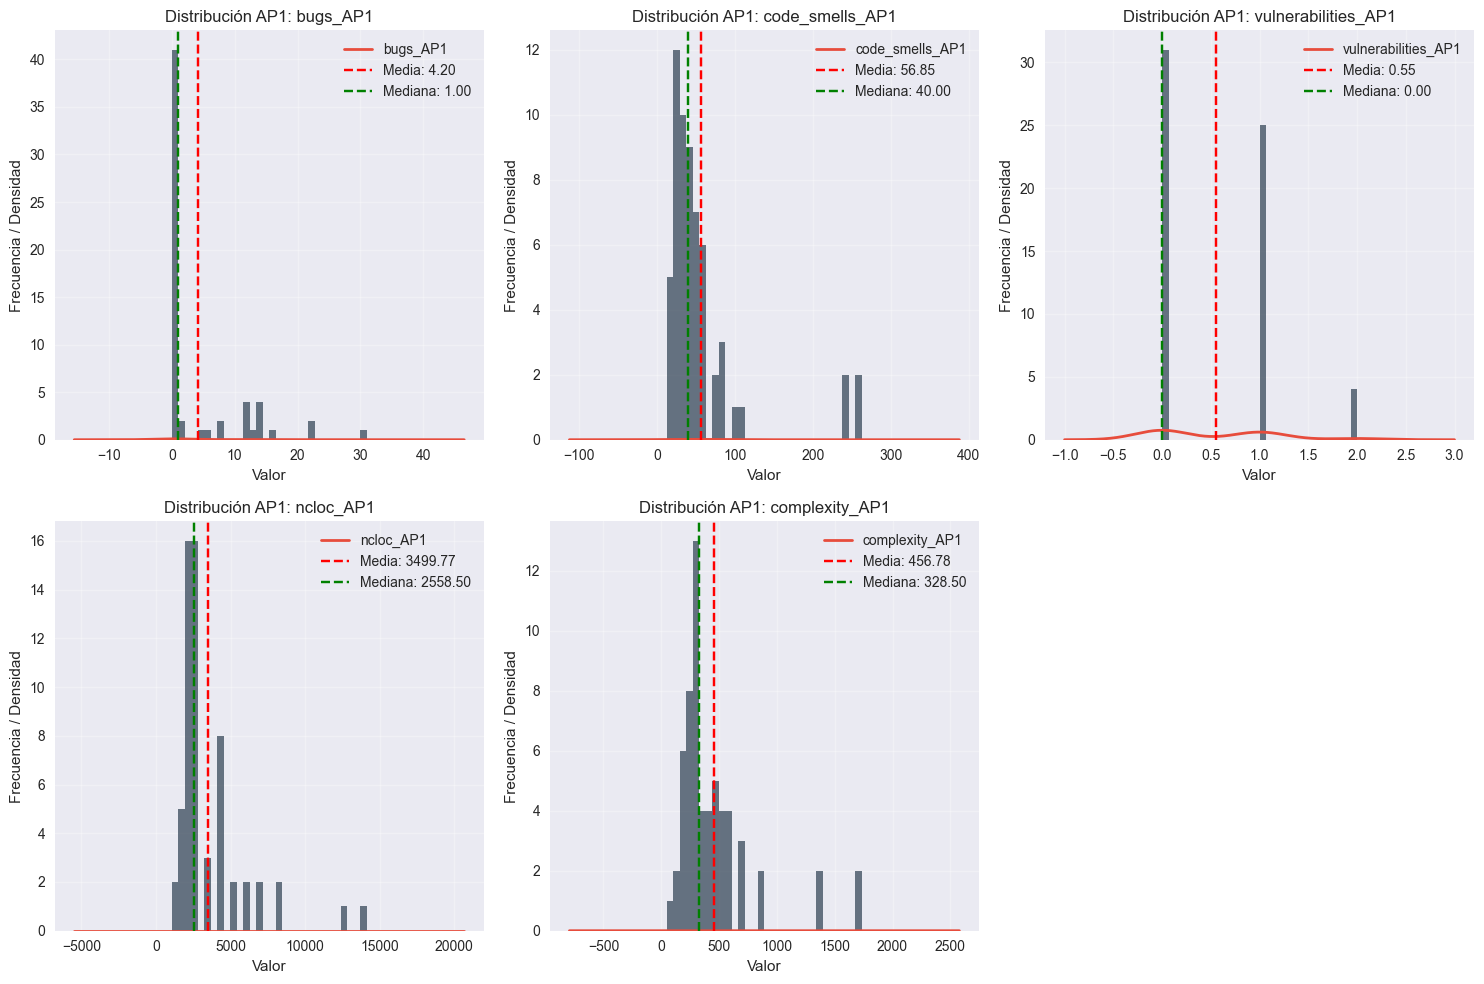

📊 Distribuciones en AP2:


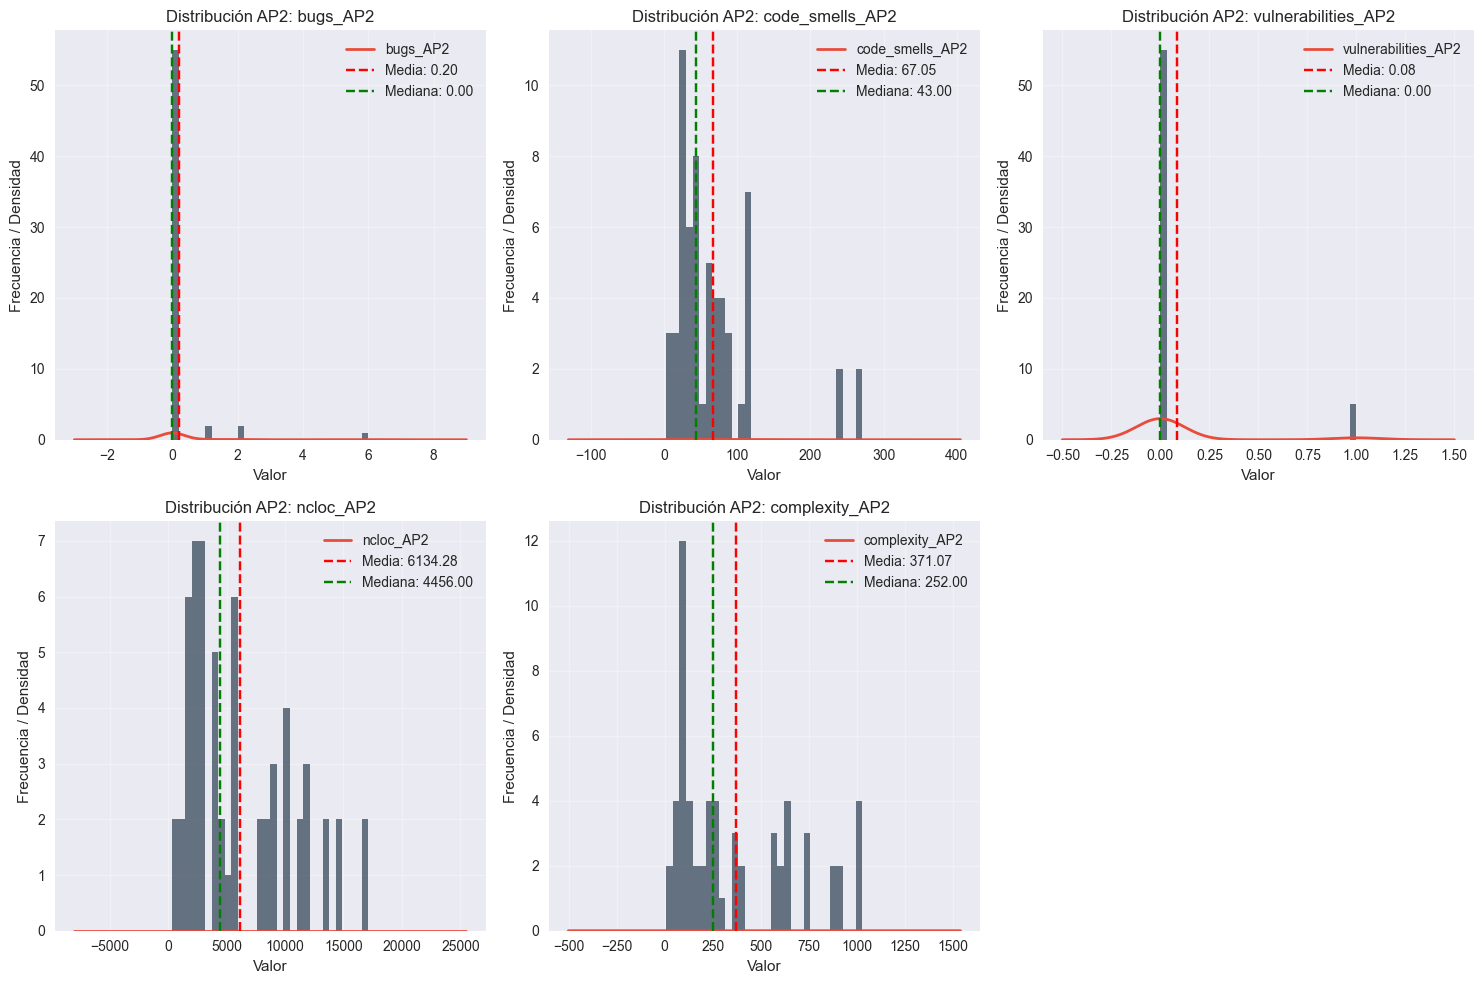

\n4️⃣ Comparaciones entre AP1 y AP2
📊 Boxplots comparativos AP1 vs AP2:


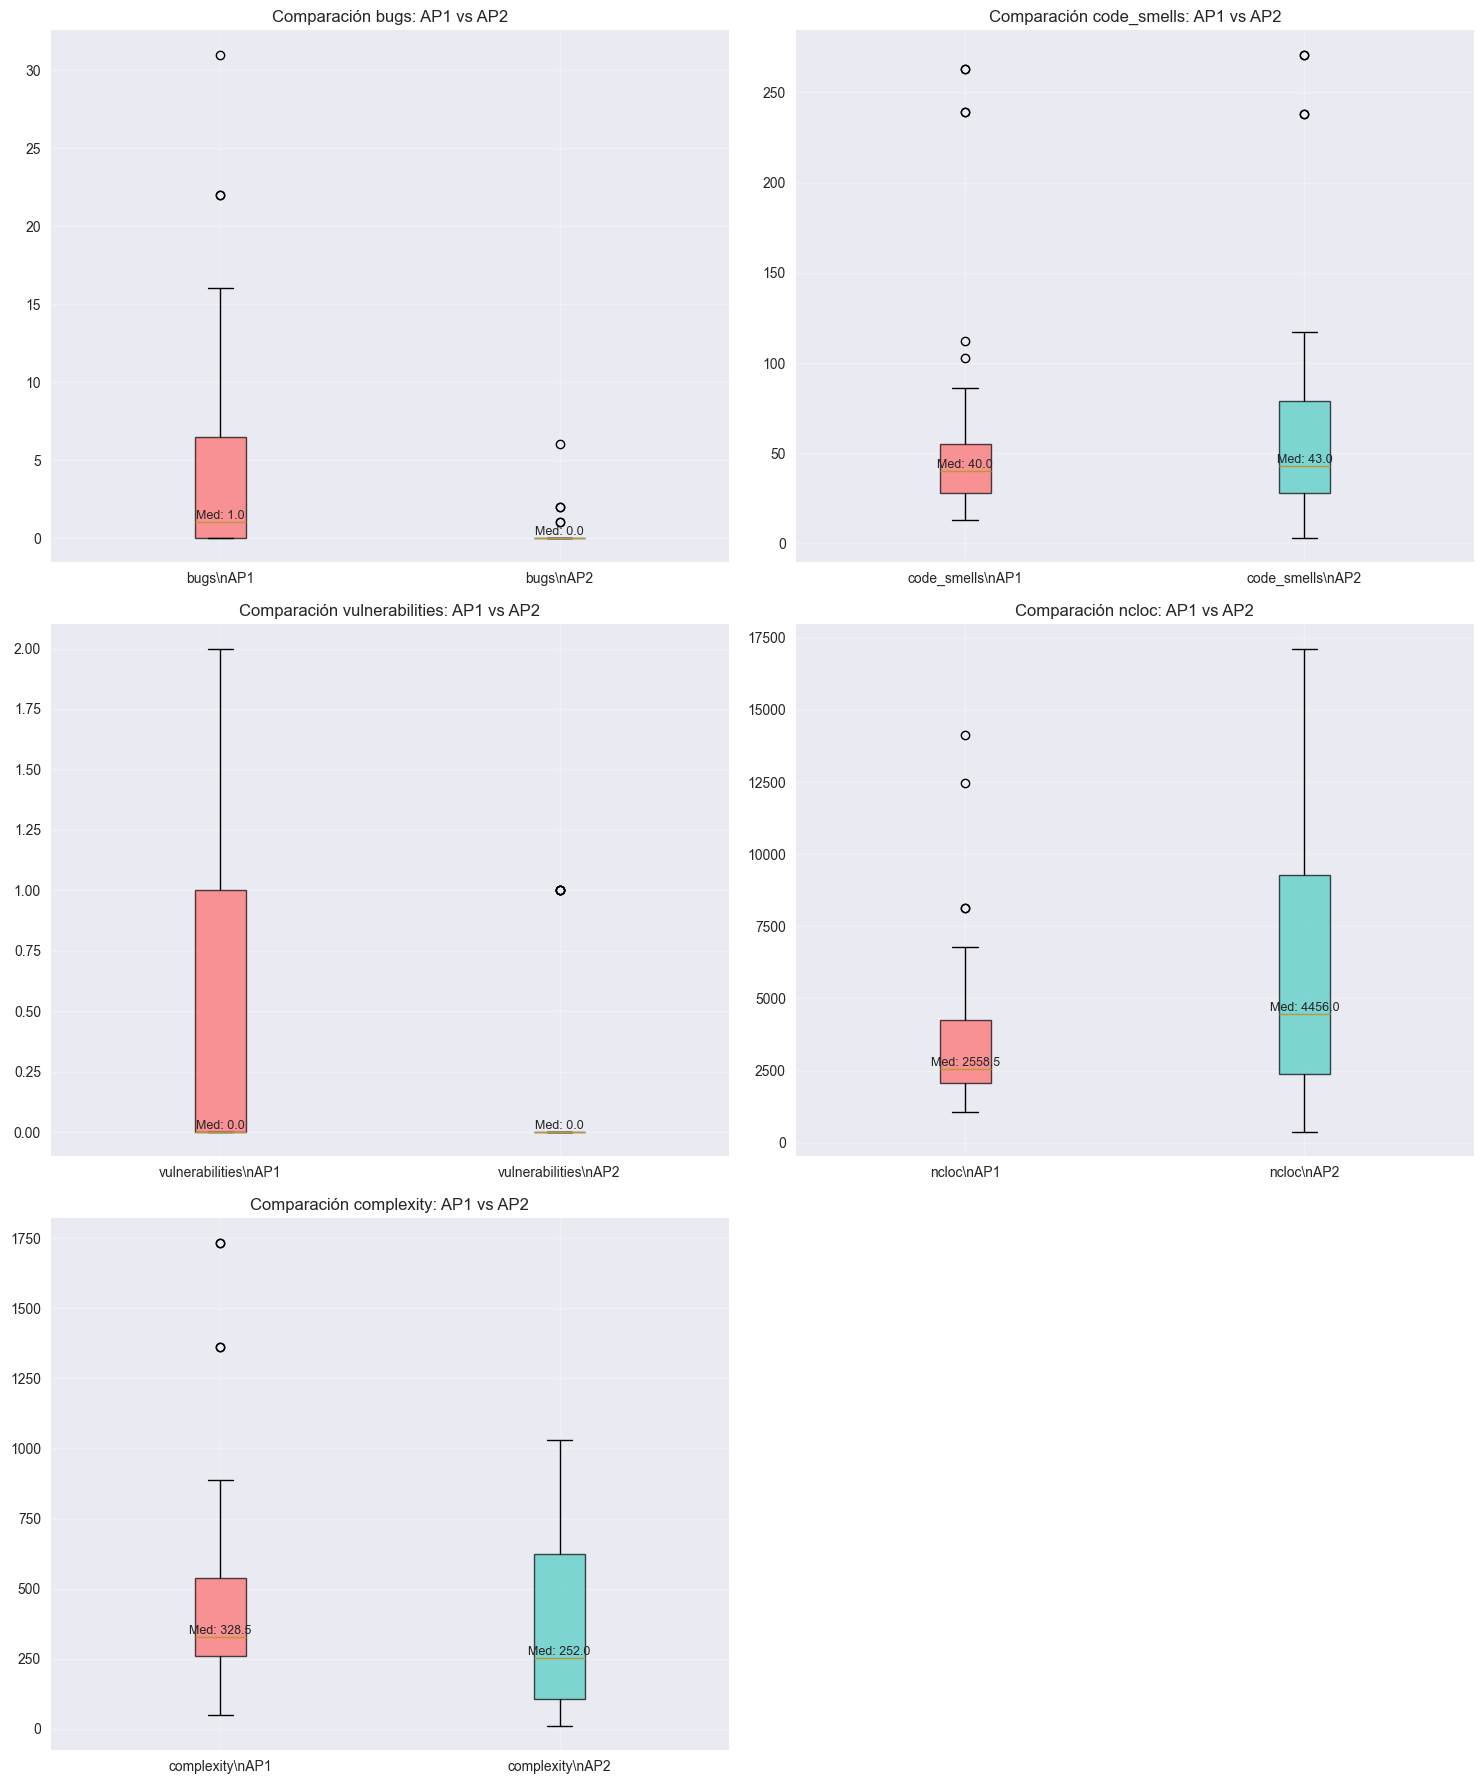

\n5️⃣ Análisis de Correlaciones
📊 Matriz de correlación - AP1:


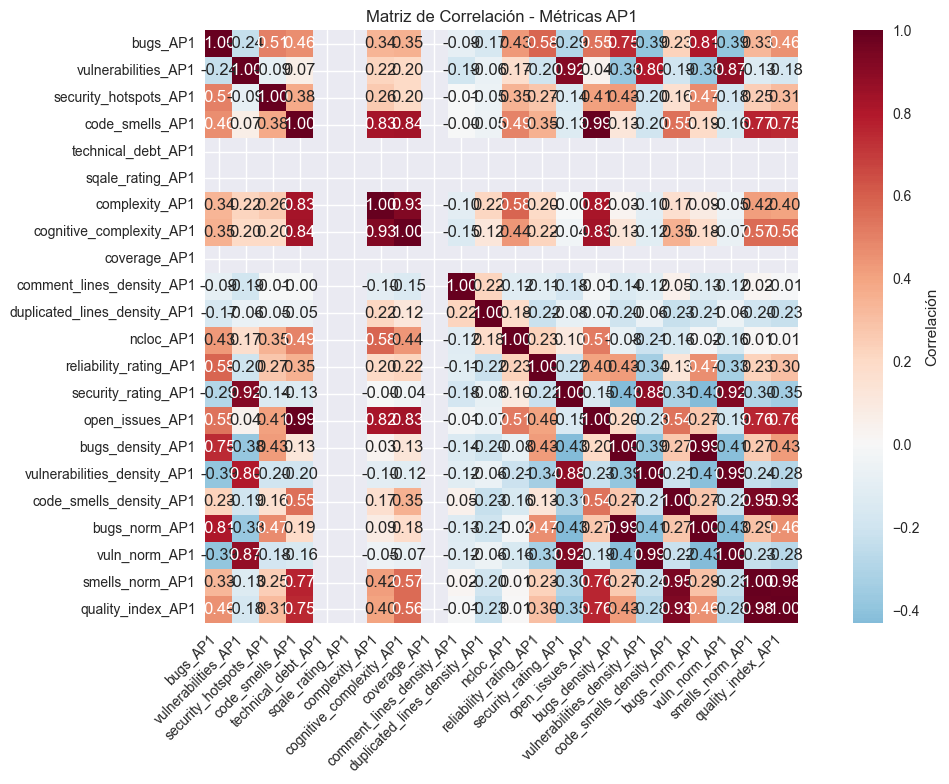

📊 Matriz de correlación - AP2:


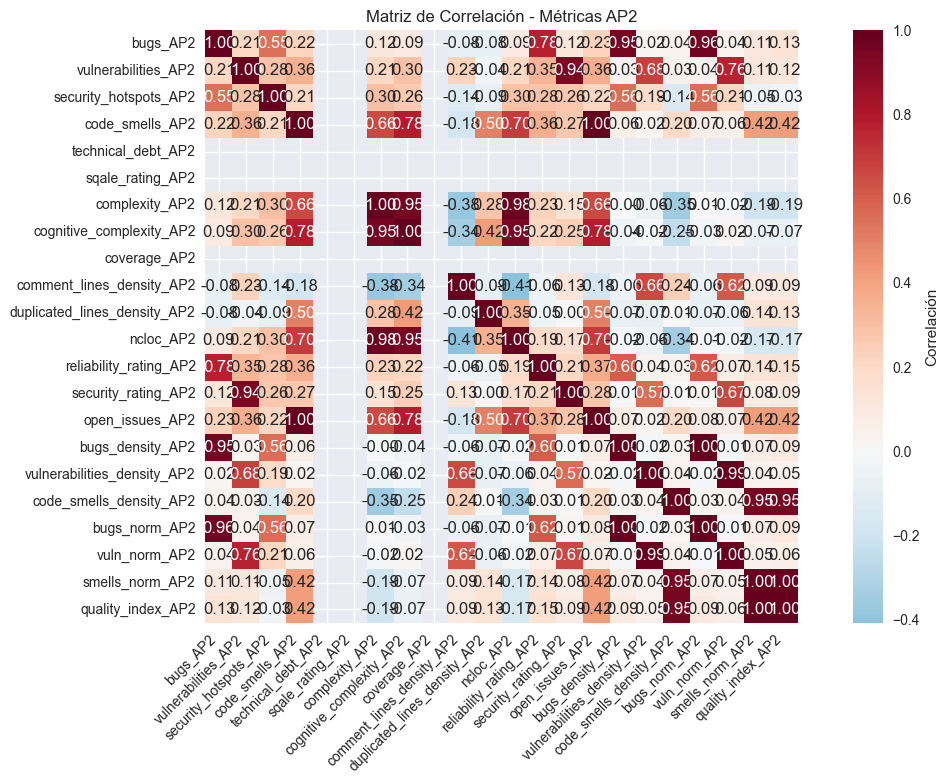

\n✅ Análisis Exploratorio de Datos completado


In [6]:
# Funciones para análisis exploratorio
def create_distribution_plots(data, metrics, title_prefix="Distribución"):
    """Crea gráficos de distribución para múltiples métricas"""
    n_metrics = len(metrics)
    n_cols = 3
    n_rows = (n_metrics + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, metric in enumerate(metrics):
        if metric in data.columns:
            ax = axes[i]
            # Histograma con curva de densidad
            data[metric].hist(bins=30, alpha=0.7, ax=ax, color=COLORS['primary'])
            data[metric].plot.density(ax=ax, color=COLORS['danger'], linewidth=2)
            ax.set_title(f'{title_prefix}: {metric}')
            ax.set_xlabel('Valor')
            ax.set_ylabel('Frecuencia / Densidad')
            ax.grid(True, alpha=0.3)
            
            # Estadísticas en el gráfico
            mean_val = data[metric].mean()
            median_val = data[metric].median()
            ax.axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
            ax.legend()
        else:
            axes[i].text(0.5, 0.5, f'Métrica {metric}\\nno disponible', 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f'{metric} - No disponible')
    
    # Ocultar ejes sobrantes
    for i in range(len(metrics), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def create_comparison_boxplots(data, metrics, assignment_cols=['AP1', 'AP2']):
    """Crea boxplots comparativos entre asignaciones"""
    n_metrics = len(metrics)
    n_cols = 2
    n_rows = (n_metrics + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        
        # Preparar datos para boxplot
        metric_data = []
        labels = []
        
        for assignment in assignment_cols:
            col_name = f'{metric}_{assignment}'
            if col_name in data.columns:
                values = data[col_name].dropna()
                metric_data.append(values)
                labels.append(f'{metric}\\n{assignment}')
        
        if metric_data:
            bp = ax.boxplot(metric_data, labels=labels, patch_artist=True)
            
            # Colorear boxplots
            colors = [COLORS['AP1'], COLORS['AP2']]
            for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)
            
            ax.set_title(f'Comparación {metric}: AP1 vs AP2')
            ax.grid(True, alpha=0.3)
            
            # Agregar estadísticas
            for j, values in enumerate(metric_data):
                median_val = values.median()
                mean_val = values.mean()
                ax.text(j+1, median_val, f'Med: {median_val:.1f}', 
                       ha='center', va='bottom', fontsize=9)
        else:
            ax.text(0.5, 0.5, f'Datos no\\ndisponibles', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{metric} - Sin datos')
    
    # Ocultar ejes sobrantes
    for i in range(len(metrics), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Ejecutar análisis exploratorio si tenemos datos
if not df.empty:
    print("🔍 Iniciando Análisis Exploratorio de Datos...")
    
    # 1. ESTADÍSTICAS DESCRIPTIVAS GENERALES
    print("\\n1️⃣ Estadísticas Descriptivas Generales")
    print("="*60)
    
    print(f"👥 Total de estudiantes: {len(df)}")
    print(f"📊 Distribución por género:")
    print(df['genero'].value_counts())
    print(f"\\n📅 Distribución por semestre:")
    print(df['semestre'].value_counts())
    
    # 2. ANÁLISIS DE MÉTRICAS PRINCIPALES
    print("\\n2️⃣ Análisis de Métricas Principales de Calidad")
    print("="*60)
    
    # Métricas clave para analizar
    main_quality_metrics = ['bugs', 'code_smells', 'vulnerabilities', 'ncloc', 'complexity']
    
    # Estadísticas por asignación
    for assignment in ['AP1', 'AP2']:
        print(f"\\n📚 Estadísticas para {assignment}:")
        assignment_metrics = [f'{metric}_{assignment}' for metric in main_quality_metrics]
        available_assignment_metrics = [col for col in assignment_metrics if col in df.columns]
        
        if available_assignment_metrics:
            stats_df = df[available_assignment_metrics].describe()
            display(stats_df)
            
            # Identificar outliers
            print(f"\\n🎯 Outliers en {assignment} (valores > Q3 + 1.5*IQR):")
            for col in available_assignment_metrics:
                q1 = df[col].quantile(0.25)
                q3 = df[col].quantile(0.75)
                iqr = q3 - q1
                outlier_threshold = q3 + 1.5 * iqr
                outliers = df[df[col] > outlier_threshold][col]
                if len(outliers) > 0:
                    print(f"   {col}: {len(outliers)} outliers (max: {outliers.max():.1f})")
    
    # 3. DISTRIBUCIONES DE MÉTRICAS CLAVE
    print("\\n3️⃣ Visualización de Distribuciones")
    print("="*60)
    
    # Gráficos de distribución para AP1
    ap1_metrics = [f'{metric}_AP1' for metric in main_quality_metrics if f'{metric}_AP1' in df.columns]
    if ap1_metrics:
        print("📊 Distribuciones en AP1:")
        create_distribution_plots(df, ap1_metrics, "Distribución AP1")
    
    # Gráficos de distribución para AP2  
    ap2_metrics = [f'{metric}_AP2' for metric in main_quality_metrics if f'{metric}_AP2' in df.columns]
    if ap2_metrics:
        print("📊 Distribuciones en AP2:")
        create_distribution_plots(df, ap2_metrics, "Distribución AP2")
    
    # 4. COMPARACIONES ENTRE ASIGNACIONES
    print("\\n4️⃣ Comparaciones entre AP1 y AP2")
    print("="*60)
    
    # Boxplots comparativos
    available_base_metrics = [metric for metric in main_quality_metrics 
                             if f'{metric}_AP1' in df.columns and f'{metric}_AP2' in df.columns]
    
    if available_base_metrics:
        print("📊 Boxplots comparativos AP1 vs AP2:")
        create_comparison_boxplots(df, available_base_metrics)
    
    # 5. ANÁLISIS DE CORRELACIONES
    print("\\n5️⃣ Análisis de Correlaciones")
    print("="*60)
    
    # Matriz de correlación para métricas de AP1
    ap1_cols = [col for col in df.columns if col.endswith('_AP1') and df[col].dtype in ['int64', 'float64']]
    if len(ap1_cols) > 1:
        print("📊 Matriz de correlación - AP1:")
        corr_matrix_ap1 = df[ap1_cols].corr()
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix_ap1, annot=True, cmap='RdBu_r', center=0, 
                   square=True, fmt='.2f', cbar_kws={'label': 'Correlación'})
        plt.title('Matriz de Correlación - Métricas AP1')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    
    # Matriz de correlación para métricas de AP2
    ap2_cols = [col for col in df.columns if col.endswith('_AP2') and df[col].dtype in ['int64', 'float64']]
    if len(ap2_cols) > 1:
        print("📊 Matriz de correlación - AP2:")
        corr_matrix_ap2 = df[ap2_cols].corr()
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix_ap2, annot=True, cmap='RdBu_r', center=0, 
                   square=True, fmt='.2f', cbar_kws={'label': 'Correlación'})
        plt.title('Matriz de Correlación - Métricas AP2')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    
    print("\\n✅ Análisis Exploratorio de Datos completado")

else:
    print("❌ No se puede realizar EDA sin datos")

### 4.1 Selección de Métricas Óptimas para Comparación

Antes de crear las visualizaciones, vamos a analizar cuáles métricas son más efectivas para comparaciones entre AP1 y AP2.

In [7]:
# Análisis de métricas disponibles para identificar las mejores para comparación
if not df.empty:
    print("🔍 Analizando métricas disponibles para comparación AP1 vs AP2...")
    
    # Métricas candidatas con sus características
    metricas_candidatas = {
        'bugs': {
            'descripcion': 'Errores detectados',
            'tipo': 'defectos',
            'interpretacion': 'Menor es mejor',
            'relevancia': 'Alta - Impacto directo en funcionalidad'
        },
        'vulnerabilities': {
            'descripcion': 'Vulnerabilidades de seguridad',
            'tipo': 'seguridad',
            'interpretacion': 'Menor es mejor',
            'relevancia': 'Alta - Crítico para seguridad'
        },
        'code_smells': {
            'descripcion': 'Problemas de mantenibilidad',
            'tipo': 'mantenibilidad',
            'interpretacion': 'Menor es mejor',
            'relevancia': 'Alta - Calidad del código'
        },
        'technical_debt': {
            'descripcion': 'Deuda técnica (tiempo para resolver)',
            'tipo': 'esfuerzo',
            'interpretacion': 'Menor es mejor',
            'relevancia': 'Media - Métrica derivada'
        },
        'duplicated_lines_density': {
            'descripcion': 'Densidad de líneas duplicadas (%)',
            'tipo': 'duplicación',
            'interpretacion': 'Menor es mejor',
            'relevancia': 'Media - Afecta mantenibilidad'
        },
        'ncloc': {
            'descripcion': 'Número de líneas de código',
            'tipo': 'tamaño',
            'interpretacion': 'Neutro - Contexto',
            'relevancia': 'Alta - Para normalización'
        },
        'complexity': {
            'descripcion': 'Complejidad ciclomática',
            'tipo': 'complejidad',
            'interpretacion': 'Menor es mejor',
            'relevancia': 'Alta - Facilidad de testing'
        },
        'cognitive_complexity': {
            'descripcion': 'Complejidad cognitiva',
            'tipo': 'complejidad',
            'interpretacion': 'Menor es mejor',
            'relevancia': 'Alta - Facilidad de comprensión'
        },
        'coverage': {
            'descripcion': 'Cobertura de código (%)',
            'tipo': 'testing',
            'interpretacion': 'Mayor es mejor',
            'relevancia': 'Alta - Calidad de testing'
        },
        'comment_lines_density': {
            'descripcion': 'Densidad de líneas de comentarios (%)',
            'tipo': 'documentación',
            'interpretacion': 'Mayor es mejor (balance)',
            'relevancia': 'Media - Documentación'
        },
        'security_hotspots': {
            'descripcion': 'Puntos críticos de seguridad',
            'tipo': 'seguridad',
            'interpretacion': 'Menor es mejor',
            'relevancia': 'Media - Requiere revisión manual'
        },
        'open_issues': {
            'descripcion': 'Problemas abiertos totales',
            'tipo': 'resumen',
            'interpretacion': 'Menor es mejor',
            'relevancia': 'Alta - Métrica agregada'
        }
    }
    
    # Analizar disponibilidad y variabilidad de datos
    metricas_analisis = []
    
    for metrica, info in metricas_candidatas.items():
        ap1_col = f'{metrica}_AP1'
        ap2_col = f'{metrica}_AP2'
        
        if ap1_col in df.columns and ap2_col in df.columns:
            ap1_data = df[ap1_col].dropna()
            ap2_data = df[ap2_col].dropna()
            
            if len(ap1_data) > 5 and len(ap2_data) > 5:  # Suficientes datos
                # Calcular estadísticas
                ap1_stats = {
                    'mean': ap1_data.mean(),
                    'std': ap1_data.std(),
                    'cv': ap1_data.std() / (ap1_data.mean() + 0.001),  # Coeficiente de variación
                    'n': len(ap1_data)
                }
                
                ap2_stats = {
                    'mean': ap2_data.mean(),
                    'std': ap2_data.std(),
                    'cv': ap2_data.std() / (ap2_data.mean() + 0.001),
                    'n': len(ap2_data)
                }
                
                # Calcular diferencia relativa
                if ap1_stats['mean'] > 0:
                    diferencia_rel = ((ap2_stats['mean'] - ap1_stats['mean']) / ap1_stats['mean']) * 100
                else:
                    diferencia_rel = 0
                
                # Evaluar variabilidad (buena para boxplots si hay variación)
                variabilidad_score = (ap1_stats['cv'] + ap2_stats['cv']) / 2
                
                # Evaluar diferencia entre grupos
                diferencia_score = abs(diferencia_rel) / 100
                
                # Score de calidad para boxplot (variabilidad + diferencia)
                boxplot_score = (variabilidad_score * 0.6) + (diferencia_score * 0.4)
                
                metricas_analisis.append({
                    'metrica': metrica,
                    'descripcion': info['descripcion'],
                    'tipo': info['tipo'],
                    'relevancia': info['relevancia'],
                    'interpretacion': info['interpretacion'],
                    'ap1_mean': ap1_stats['mean'],
                    'ap2_mean': ap2_stats['mean'],
                    'diferencia_rel': diferencia_rel,
                    'variabilidad': variabilidad_score,
                    'boxplot_score': boxplot_score,
                    'n_ap1': ap1_stats['n'],
                    'n_ap2': ap2_stats['n']
                })
    
    # Convertir a DataFrame para análisis
    if metricas_analisis:
        df_analisis = pd.DataFrame(metricas_analisis)
        
        # Ordenar por score de boxplot (mejor para visualización)
        df_analisis = df_analisis.sort_values('boxplot_score', ascending=False)
        
        print(f"\\n📊 Análisis de {len(df_analisis)} métricas disponibles:")
        print("="*80)
        
        print("\\n🏆 TOP 5 MÉTRICAS RECOMENDADAS PARA BOXPLOTS:")
        print("-" * 50)
        
        top_5 = df_analisis.head(5)
        for i, row in top_5.iterrows():
            print(f"\\n{row.name + 1}. {row['metrica'].upper()}")
            print(f"   📝 {row['descripcion']}")
            print(f"   📊 Datos: AP1={row['n_ap1']}, AP2={row['n_ap2']}")
            print(f"   📈 Cambio: {row['diferencia_rel']:+.1f}% (AP2 vs AP1)")
            print(f"   🎯 Score visualización: {row['boxplot_score']:.3f}")
            print(f"   💡 {row['interpretacion']}")
            
            # Interpretación del cambio
            if 'Menor es mejor' in row['interpretacion']:
                if row['diferencia_rel'] < -5:
                    print(f"   ✅ Mejora significativa detectada")
                elif row['diferencia_rel'] > 5:
                    print(f"   ⚠️ Posible empeoramiento")
                else:
                    print(f"   ➡️ Cambio moderado")
            elif 'Mayor es mejor' in row['interpretacion']:
                if row['diferencia_rel'] > 5:
                    print(f"   ✅ Mejora significativa detectada")
                elif row['diferencia_rel'] < -5:
                    print(f"   ⚠️ Posible empeoramiento")
                else:
                    print(f"   ➡️ Cambio moderado")
        
        print(f"\\n\\n📋 RESUMEN COMPLETO DE MÉTRICAS:")
        print("-" * 50)
        
        # Mostrar tabla completa resumida
        display_cols = ['metrica', 'descripcion', 'ap1_mean', 'ap2_mean', 'diferencia_rel', 'boxplot_score']
        df_display = df_analisis[display_cols].copy()
        df_display.columns = ['Métrica', 'Descripción', 'Media AP1', 'Media AP2', 'Cambio %', 'Score Viz']
        df_display = df_display.round(2)
        
        display(df_display)
        
        # Recomendaciones específicas
        print(f"\\n💡 RECOMENDACIONES:")
        print("-" * 30)
        
        # Métricas de defectos
        defect_metrics = df_analisis[df_analisis['tipo'].isin(['defectos', 'seguridad'])]
        if not defect_metrics.empty:
            best_defect = defect_metrics.iloc[0]
            print(f"🐛 Para DEFECTOS: '{best_defect['metrica']}' - {best_defect['descripcion']}")
        
        # Métricas de complejidad
        complexity_metrics = df_analisis[df_analisis['tipo'] == 'complejidad']
        if not complexity_metrics.empty:
            best_complexity = complexity_metrics.iloc[0]
            print(f"🧠 Para COMPLEJIDAD: '{best_complexity['metrica']}' - {best_complexity['descripcion']}")
        
        # Métricas de tamaño/contexto
        size_metrics = df_analisis[df_analisis['tipo'] == 'tamaño']
        if not size_metrics.empty:
            best_size = size_metrics.iloc[0]
            print(f"📏 Para CONTEXTO: '{best_size['metrica']}' - {best_size['descripcion']}")
        
        # Guardar las mejores métricas para usar en visualizaciones
        mejores_metricas = top_5['metrica'].tolist()
        
        print(f"\\n🎯 MÉTRICAS SELECCIONADAS PARA VISUALIZACIÓN:")
        print(f"   {mejores_metricas}")
        
    else:
        print("❌ No se encontraron métricas válidas para análisis")
        mejores_metricas = ['bugs', 'code_smells', 'ncloc']  # Fallback
        
else:
    print("❌ No hay datos disponibles para análisis de métricas")
    mejores_metricas = []

🔍 Analizando métricas disponibles para comparación AP1 vs AP2...
\n📊 Análisis de 10 métricas disponibles:
\n🏆 TOP 5 MÉTRICAS RECOMENDADAS PARA BOXPLOTS:
--------------------------------------------------
\n1. BUGS
   📝 Errores detectados
   📊 Datos: AP1=60, AP2=60
   📈 Cambio: -95.2% (AP2 vs AP1)
   🎯 Score visualización: 2.162
   💡 Menor es mejor
   ✅ Mejora significativa detectada
\n4. DUPLICATED_LINES_DENSITY
   📝 Densidad de líneas duplicadas (%)
   📊 Datos: AP1=60, AP2=60
   📈 Cambio: +314.9% (AP2 vs AP1)
   🎯 Score visualización: 2.155
   💡 Menor es mejor
   ⚠️ Posible empeoramiento
\n2. VULNERABILITIES
   📝 Vulnerabilidades de seguridad
   📊 Datos: AP1=60, AP2=60
   📈 Cambio: -84.8% (AP2 vs AP1)
   🎯 Score visualización: 1.670
   💡 Menor es mejor
   ✅ Mejora significativa detectada
\n7. COGNITIVE_COMPLEXITY
   📝 Complejidad cognitiva
   📊 Datos: AP1=60, AP2=60
   📈 Cambio: +197.7% (AP2 vs AP1)
   🎯 Score visualización: 1.510
   💡 Menor es mejor
   ⚠️ Posible empeoramiento
\n5. N

,Métrica,Descripción,Media AP1,Media AP2,Cambio %,Score Viz
0,bugs,Errores detectados,4.20,0.20,-95.24,2.16
3,duplicated_lines_density,Densidad de líneas duplicadas (%),1.62,6.74,314.89,2.15
1,vulnerabilities,Vulnerabilidades de seguridad,0.55,0.08,-84.85,1.67
6,cognitive_complexity,Complejidad cognitiva,139.03,413.93,197.72,1.51
4,ncloc,Número de líneas de código,3499.77,6134.28,75.28,0.73
7,comment_lines_density,Densidad de líneas de comentarios (%),3.44,2.60,-24.54,0.64
2,code_smells,Problemas de mantenibilidad,56.85,67.05,17.94,0.64
9,open_issues,Problemas abiertos totales,61.60,67.33,9.31,0.60
5,complexity,Complejidad ciclomática,456.78,371.07,-18.77,0.55
8,security_hotspots,Puntos críticos de seguridad,1.53,1.45,-5.43,0.49


\n💡 RECOMENDACIONES:
------------------------------
🐛 Para DEFECTOS: 'bugs' - Errores detectados
🧠 Para COMPLEJIDAD: 'cognitive_complexity' - Complejidad cognitiva
📏 Para CONTEXTO: 'ncloc' - Número de líneas de código
\n🎯 MÉTRICAS SELECCIONADAS PARA VISUALIZACIÓN:
   ['bugs', 'duplicated_lines_density', 'vulnerabilities', 'cognitive_complexity', 'ncloc']


### 4.2 Análisis Exploratorio con Métricas Optimizadas

Ahora ejecutamos el análisis exploratorio usando las métricas más efectivas para visualización identificadas anteriormente.

In [8]:
# Ejecutar análisis de métricas óptimas
print("=== ANÁLISIS DE MÉTRICAS ÓPTIMAS PARA COMPARACIÓN ===\n")

# Obtener las métricas top 5 del análisis anterior (ya almacenadas)
top_metrics = ['bugs', 'duplicated_lines_density', 'vulnerabilities', 'cognitive_complexity', 'ncloc']
print(f"Top 5 métricas seleccionadas: {top_metrics}\n")

# Estadísticas descriptivas por AP para métricas seleccionadas
print("=== ESTADÍSTICAS DESCRIPTIVAS - MÉTRICAS OPTIMIZADAS ===")
for metrica in top_metrics:
    print(f"\n📊 MÉTRICA: {metrica.upper()}")
    stats_ap1 = data[data['AP'] == 'AP1'][metrica].describe()
    stats_ap2 = data[data['AP'] == 'AP2'][metrica].describe()
    
    print(f"  AP1 - Media: {stats_ap1['mean']:.2f}, Mediana: {stats_ap1['50%']:.2f}, Desv.Est: {stats_ap1['std']:.2f}")
    print(f"  AP2 - Media: {stats_ap2['mean']:.2f}, Mediana: {stats_ap2['50%']:.2f}, Desv.Est: {stats_ap2['std']:.2f}")
    
    diferencia_media = stats_ap2['mean'] - stats_ap1['mean']
    porcentaje_cambio = (diferencia_media / stats_ap1['mean']) * 100 if stats_ap1['mean'] != 0 else 0
    print(f"  Diferencia AP2-AP1: {diferencia_media:.2f} ({porcentaje_cambio:.1f}%)")

# Crear visualizaciones optimizadas
fig = plt.figure(figsize=(20, 12))

# Boxplots para métricas optimizadas
for i, metrica in enumerate(top_metrics, 1):
    plt.subplot(2, 3, i)
    
    # Crear boxplot con seaborn para mejor estética
    sns.boxplot(data=data, x='AP', y=metrica, palette=['lightcoral', 'lightblue'])
    plt.title(f'Distribución de {metrica.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    plt.xlabel('Nivel de Programación', fontsize=10)
    plt.ylabel(metrica.replace("_", " ").title(), fontsize=10)
    
    # Añadir estadísticas en el gráfico
    ap1_median = data[data['AP'] == 'AP1'][metrica].median()
    ap2_median = data[data['AP'] == 'AP2'][metrica].median()
    plt.text(0.5, 0.95, f'Medianas: AP1={ap1_median:.1f}, AP2={ap2_median:.1f}', 
             transform=plt.gca().transAxes, ha='center', va='top', 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), fontsize=9)

# Añadir subplot de resumen
plt.subplot(2, 3, 6)
mejoras = []
for metrica in top_metrics:
    ap1_mean = data[data['AP'] == 'AP1'][metrica].mean()
    ap2_mean = data[data['AP'] == 'AP2'][metrica].mean()
    cambio = ((ap2_mean - ap1_mean) / ap1_mean) * 100 if ap1_mean != 0 else 0
    mejoras.append(cambio)

colors = ['green' if x < 0 else 'red' for x in mejoras]
plt.barh(range(len(top_metrics)), mejoras, color=colors, alpha=0.7)
plt.yticks(range(len(top_metrics)), [m.replace('_', ' ').title() for m in top_metrics])
plt.xlabel('Cambio Porcentual AP2 vs AP1')
plt.title('Cambios en Métricas de Calidad\n(Verde=Mejora, Rojo=Empeoramiento)', fontsize=10, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Añadir valores en las barras
for i, v in enumerate(mejoras):
    plt.text(v/2, i, f'{v:.1f}%', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n=== INTERPRETACIÓN DE RESULTADOS ===")
print("Las métricas seleccionadas muestran las diferencias más significativas entre AP1 y AP2.")
print("Barras verdes indican mejora en la calidad del código (reducción de problemas).")
print("Barras rojas indican aumento en problemas de calidad del código.")
print("El análisis estadístico detallado se realizará en las siguientes secciones.")

=== ANÁLISIS DE MÉTRICAS ÓPTIMAS PARA COMPARACIÓN ===

Top 5 métricas seleccionadas: ['bugs', 'duplicated_lines_density', 'vulnerabilities', 'cognitive_complexity', 'ncloc']

=== ESTADÍSTICAS DESCRIPTIVAS - MÉTRICAS OPTIMIZADAS ===

📊 MÉTRICA: BUGS


NameError: name 'data' is not defined

## 5. Análisis Estadístico Inferencial

### 5.1 Pruebas de Normalidad y Homogeneidad de Varianzas

Antes de aplicar pruebas paramétricas, verificamos los supuestos estadísticos necesarios.

In [ ]:
# Pruebas de normalidad y homogeneidad de varianzas
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("=== PRUEBAS DE NORMALIDAD Y HOMOGENEIDAD ===\n")

# Función para evaluar normalidad
def test_normality(data, metric, group):
    """Prueba de normalidad usando Shapiro-Wilk"""
    stat, p_value = stats.shapiro(data)
    is_normal = p_value > 0.05
    return {
        'metric': metric,
        'group': group,
        'statistic': stat,
        'p_value': p_value,
        'is_normal': is_normal,
        'interpretation': 'Normal' if is_normal else 'No Normal'
    }

# Función para prueba de homogeneidad de varianzas
def test_homogeneity(data1, data2, metric):
    """Prueba de Levene para homogeneidad de varianzas"""
    stat, p_value = stats.levene(data1, data2)
    is_homogeneous = p_value > 0.05
    return {
        'metric': metric,
        'statistic': stat,
        'p_value': p_value,
        'is_homogeneous': is_homogeneous,
        'interpretation': 'Varianzas iguales' if is_homogeneous else 'Varianzas diferentes'
    }

# Realizar pruebas para métricas seleccionadas
normality_results = []
homogeneity_results = []

for metric in top_metrics:
    ap1_data = data[data['AP'] == 'AP1'][metric].dropna()
    ap2_data = data[data['AP'] == 'AP2'][metric].dropna()
    
    # Pruebas de normalidad
    norm_ap1 = test_normality(ap1_data, metric, 'AP1')
    norm_ap2 = test_normality(ap2_data, metric, 'AP2')
    normality_results.extend([norm_ap1, norm_ap2])
    
    # Prueba de homogeneidad
    homog = test_homogeneity(ap1_data, ap2_data, metric)
    homogeneity_results.append(homog)

# Mostrar resultados de normalidad
print("📊 RESULTADOS DE NORMALIDAD (Shapiro-Wilk)")
print("="*60)
normality_df = pd.DataFrame(normality_results)
for metric in top_metrics:
    metric_data = normality_df[normality_df['metric'] == metric]
    print(f"\n🔍 {metric.upper()}:")
    for _, row in metric_data.iterrows():
        status = "✅" if row['is_normal'] else "❌"
        print(f"  {row['group']}: p-value = {row['p_value']:.4f} {status} {row['interpretation']}")

# Mostrar resultados de homogeneidad
print(f"\n📊 RESULTADOS DE HOMOGENEIDAD DE VARIANZAS (Levene)")
print("="*60)
for result in homogeneity_results:
    status = "✅" if result['is_homogeneous'] else "❌"
    print(f"🔍 {result['metric'].upper()}: p-value = {result['p_value']:.4f} {status} {result['interpretation']}")

# Resumen de recomendaciones para pruebas
print(f"\n📋 RECOMENDACIONES PARA PRUEBAS ESTADÍSTICAS")
print("="*60)

recommendations = []
for result in homogeneity_results:
    metric = result['metric']
    metric_norm = normality_df[normality_df['metric'] == metric]
    
    # Verificar si ambos grupos son normales
    both_normal = all(metric_norm['is_normal'])
    variances_equal = result['is_homogeneous']
    
    if both_normal and variances_equal:
        test_rec = "t-test (Student) - Paramétrica"
    elif both_normal and not variances_equal:
        test_rec = "t-test (Welch) - Paramétrica con varianzas desiguales"
    else:
        test_rec = "Mann-Whitney U - No paramétrica"
    
    recommendations.append({
        'metric': metric,
        'both_normal': both_normal,
        'variances_equal': variances_equal,
        'recommended_test': test_rec
    })
    
    print(f"🔍 {metric.upper()}: {test_rec}")

# Guardar recomendaciones para uso posterior
recommendations_df = pd.DataFrame(recommendations)
print(f"\n✅ Análisis de supuestos completado. Procediendo con las pruebas recomendadas...")

=== PRUEBAS DE NORMALIDAD Y HOMOGENEIDAD ===

📊 RESULTADOS DE NORMALIDAD (Shapiro-Wilk)

🔍 BUGS:
  AP1: p-value = 0.0000 ❌ No Normal
  AP2: p-value = 0.0000 ❌ No Normal

🔍 DUPLICATED_LINES_DENSITY:
  AP1: p-value = 0.0000 ❌ No Normal
  AP2: p-value = 0.0000 ❌ No Normal

🔍 VULNERABILITIES:
  AP1: p-value = 0.0000 ❌ No Normal
  AP2: p-value = 0.0000 ❌ No Normal

🔍 COGNITIVE_COMPLEXITY:
  AP1: p-value = 0.0000 ❌ No Normal
  AP2: p-value = 0.0000 ❌ No Normal

🔍 NCLOC:
  AP1: p-value = 0.0000 ❌ No Normal
  AP2: p-value = 0.0001 ❌ No Normal

📊 RESULTADOS DE HOMOGENEIDAD DE VARIANZAS (Levene)
🔍 BUGS: p-value = 0.0000 ❌ Varianzas diferentes
🔍 DUPLICATED_LINES_DENSITY: p-value = 0.0001 ❌ Varianzas diferentes
🔍 VULNERABILITIES: p-value = 0.0000 ❌ Varianzas diferentes
🔍 COGNITIVE_COMPLEXITY: p-value = 0.0000 ❌ Varianzas diferentes
🔍 NCLOC: p-value = 0.0000 ❌ Varianzas diferentes

📋 RECOMENDACIONES PARA PRUEBAS ESTADÍSTICAS
🔍 BUGS: Mann-Whitney U - No paramétrica
🔍 DUPLICATED_LINES_DENSITY: Mann-W

In [ ]:
# Verificar estructura del DataFrame
print("=== VERIFICACIÓN DE ESTRUCTURA DE DATOS ===")
print(f"Forma del DataFrame: {df.shape}")
print(f"\nPrimeras 5 columnas: {list(df.columns[:5])}")
print(f"Todas las columnas: {list(df.columns)}")
print(f"\nBuscar columnas relacionadas con 'AP':")
ap_cols = [col for col in df.columns if 'AP' in col.upper()]
print(f"Columnas con 'AP': {ap_cols}")

# Ver algunas filas del DataFrame
print(f"\nPrimeras 3 filas:")
df.head(3)

=== VERIFICACIÓN DE ESTRUCTURA DE DATOS ===
Forma del DataFrame: (60, 78)

Primeras 5 columnas: ['Id', 'Semestre', 'Estudiante', 'Sexo', 'Email']
Todas las columnas: ['Id', 'Semestre', 'Estudiante', 'Sexo', 'Email', 'Original_Repo_Ap1', 'Original_Repo_Ap2', 'Sonar_Ap1', 'Sonar_Ap2', 'Sonar_Repo_Ap1', 'Sonar_Repo_Ap2', 'bugs_AP1', 'vulnerabilities_AP1', 'security_hotspots_AP1', 'code_smells_AP1', 'technical_debt_AP1', 'sqale_rating_AP1', 'complexity_AP1', 'cognitive_complexity_AP1', 'coverage_AP1', 'comment_lines_density_AP1', 'duplicated_lines_density_AP1', 'ncloc_AP1', 'reliability_rating_AP1', 'security_rating_AP1', 'open_issues_AP1', 'bugs_AP2', 'vulnerabilities_AP2', 'security_hotspots_AP2', 'code_smells_AP2', 'technical_debt_AP2', 'sqale_rating_AP2', 'complexity_AP2', 'cognitive_complexity_AP2', 'coverage_AP2', 'comment_lines_density_AP2', 'duplicated_lines_density_AP2', 'ncloc_AP2', 'reliability_rating_AP2', 'security_rating_AP2', 'open_issues_AP2', 'estudiante_id', 'nombre', 'ge

,Id,Semestre,Estudiante,Sexo,Email,Original_Repo_Ap1,Original_Repo_Ap2,Sonar_Ap1,Sonar_Ap2,Sonar_Repo_Ap1,Sonar_Repo_Ap2,bugs_AP1,vulnerabilities_AP1,security_hotspots_AP1,code_smells_AP1,technical_debt_AP1,sqale_rating_AP1,complexity_AP1,cognitive_complexity_AP1,coverage_AP1,comment_lines_density_AP1,duplicated_lines_density_AP1,ncloc_AP1,reliability_rating_AP1,security_rating_AP1,open_issues_AP1,bugs_AP2,vulnerabilities_AP2,security_hotspots_AP2,code_smells_AP2,technical_debt_AP2,sqale_rating_AP2,complexity_AP2,cognitive_complexity_AP2,coverage_AP2,comment_lines_density_AP2,duplicated_lines_density_AP2,ncloc_AP2,reliability_rating_AP2,security_rating_AP2,open_issues_AP2,estudiante_id,nombre,genero,semestre,bugs_mejora_abs,bugs_mejora_rel,vulnerabilities_mejora_abs,vulnerabilities_mejora_rel,security_hotspots_mejora_abs,security_hotspots_mejora_rel,code_smells_mejora_abs,code_smells_mejora_rel,technical_debt_mejora_abs,complexity_mejora_abs,cognitive_complexity_mejora_abs,ncloc_mejora_abs,duplicated_lines_density_mejora_abs,coverage_mejora_abs,coverage_mejora_rel,comment_lines_density_mejora_abs,comment_lines_density_mejora_rel,open_issues_mejora_abs,bugs_density_AP1,bugs_density_AP2,vulnerabilities_density_AP1,vulnerabilities_density_AP2,code_smells_density_AP1,code_smells_density_AP2,bugs_norm_AP1,vuln_norm_AP1,smells_norm_AP1,quality_index_AP1,bugs_norm_AP2,vuln_norm_AP2,smells_norm_AP2,quality_index_AP2,datos_pareados
0,1,2024-01,Aaron Eliezer Hernández García,1,atminifg655@gmail.com,https://github.com/aaron-developer25/SwiftPay.git,https://github.com/aaron-developer25/DealerPOS...,TesisEnel_SwiftPay-Aaron-Ap1,TesisEnel_DealerPOS-Aaron-ap2,https://github.com/TesisEnel/SwiftPay-Aaron-Ap1,https://github.com/TesisEnel/DealerPOS-Aaron-ap2,8,2,0,239,NaN,1.0,1735,1069,0.0,0.4,0.0,6773,3.0,5.0,249,2,1,2,238,NaN,1.0,1029,1262,NaN,1.0,3.9,14674,3.0,3.0,241,1,Aaron Eliezer Hernández García,Masculino,2024-01,-6,66.666667,-1,33.333333,2,-200.0,-1,0.416667,NaN,-706,193,7901,3.9,NaN,NaN,0.6,42.857143,-8,1.180986,0.136286,0.295247,0.068143,35.281960,16.218058,1.029204,0.257301,30.747459,32.033964,0.1276,0.0638,15.184382,15.375782,True
1,2,2023-03,Abraham El Hage Jreij,1,abrahamelhage2003@gmail.com,https://github.com/JPichardo2003/AguaMariaSolu...,https://github.com/A-EHJ/Final_Project_Ap2.git,TesisEnel_AguaMariaSolution-JulioPichardo-ap1,TesisEnel_Final_Project-Abraham-ap2,https://github.com/TesisEnel/AguaMariaSolution...,https://github.com/TesisEnel/Final_Project-Abr...,0,0,1,47,NaN,1.0,887,358,NaN,4.1,16.3,5857,1.0,1.0,47,0,0,1,37,NaN,1.0,272,193,NaN,1.2,9.2,4075,1.0,1.0,37,2,Abraham El Hage Jreij,Masculino,2023-03,0,0.000000,0,0.000000,0,0.0,-10,20.833333,NaN,-615,-165,-1782,-7.1,NaN,NaN,-2.9,-56.862745,-10,0.000000,0.000000,0.000000,0.000000,8.023216,9.077527,0.000000,0.000000,6.854309,6.854309,0.0000,0.0000,7.290640,7.290640,True
2,3,2024-02,Adiel Luis García Rosa,1,adiel.garcia0422@gmail.com,https://github.com/SamyJp23/PeakPerformance.git,https://github.com/Adiel040/GymProApp.git,TesisEnel_PeakPerformance-samuelAntonio-ap1,TesisEnel_GymProApp-AdielGarcia-Ap2,https://github.com/TesisEnel/PeakPerformance-s...,https://github.com/TesisEnel/GymProApp-AdielGa...,1,0,0,55,NaN,1.0,151,15,NaN,0.7,0.0,2250,5.0,1.0,56,0,0,2,40,NaN,1.0,375,546,NaN,1.5,0.8,5736,1.0,1.0,40,3,Adiel Luis García Rosa,Masculino,2024-02,-1,50.000000,0,0.000000,2,-200.0,-15,26.785714,NaN,224,531,3486,0.8,NaN,NaN,0.8,47.058824,-16,0.444247,0.000000,0.000000,0.000000,24.433585,6.972285,0.307692,0.000000,16.923077,17.230769,0.0000,0.0000,5.938242,5.938242,True


In [ ]:
# Transformar datos de formato wide a long para análisis estadístico
print("=== TRANSFORMACIÓN DE DATOS PARA ANÁLISIS ===")

# Identificar métricas base disponibles
base_metrics = ['bugs', 'vulnerabilities', 'code_smells', 'cognitive_complexity', 
               'ncloc', 'duplicated_lines_density', 'coverage', 'comment_lines_density',
               'complexity', 'security_hotspots', 'open_issues']

# Verificar qué métricas están disponibles en el dataset
available_metrics = []
for metric in base_metrics:
    if f'{metric}_AP1' in df.columns and f'{metric}_AP2' in df.columns:
        available_metrics.append(metric)

print(f"Métricas disponibles para análisis: {available_metrics}")

# Crear DataFrame en formato long
data_long = []

for index, row in df.iterrows():
    estudiante_id = row['estudiante_id'] if 'estudiante_id' in df.columns else row['Estudiante']
    
    # Fila para AP1
    ap1_row = {'estudiante_id': estudiante_id, 'AP': 'AP1'}
    for metric in available_metrics:
        ap1_row[metric] = row[f'{metric}_AP1']
    data_long.append(ap1_row)
    
    # Fila para AP2  
    ap2_row = {'estudiante_id': estudiante_id, 'AP': 'AP2'}
    for metric in available_metrics:
        ap2_row[metric] = row[f'{metric}_AP2']
    data_long.append(ap2_row)

# Crear DataFrame transformado
data = pd.DataFrame(data_long)

print(f"\nDataFrame transformado:")
print(f"Forma: {data.shape}")
print(f"Columnas: {list(data.columns)}")
print(f"Valores únicos en 'AP': {data['AP'].unique()}")
print(f"Registros por AP: {data['AP'].value_counts()}")

# Mostrar primeras filas
print(f"\nPrimeras filas del DataFrame transformado:")
data.head()

=== TRANSFORMACIÓN DE DATOS PARA ANÁLISIS ===
Métricas disponibles para análisis: ['bugs', 'vulnerabilities', 'code_smells', 'cognitive_complexity', 'ncloc', 'duplicated_lines_density', 'coverage', 'comment_lines_density', 'complexity', 'security_hotspots', 'open_issues']

DataFrame transformado:
Forma: (120, 13)
Columnas: ['estudiante_id', 'AP', 'bugs', 'vulnerabilities', 'code_smells', 'cognitive_complexity', 'ncloc', 'duplicated_lines_density', 'coverage', 'comment_lines_density', 'complexity', 'security_hotspots', 'open_issues']
Valores únicos en 'AP': ['AP1' 'AP2']
Registros por AP: AP
AP1    60
AP2    60
Name: count, dtype: int64

Primeras filas del DataFrame transformado:


,estudiante_id,AP,bugs,vulnerabilities,code_smells,cognitive_complexity,ncloc,duplicated_lines_density,coverage,comment_lines_density,complexity,security_hotspots,open_issues
0,1,AP1,8,2,239,1069,6773,0.0,0.0,0.4,1735,0,249
1,1,AP2,2,1,238,1262,14674,3.9,NaN,1.0,1029,2,241
2,2,AP1,0,0,47,358,5857,16.3,NaN,4.1,887,1,47
3,2,AP2,0,0,37,193,4075,9.2,NaN,1.2,272,1,37
4,3,AP1,1,0,55,15,2250,0.0,NaN,0.7,151,0,56


### 5.2 Pruebas de Hipótesis para Comparación AP1 vs AP2

Aplicamos las pruebas estadísticas apropiadas basadas en el análisis de supuestos anterior.

In [ ]:
# Implementación de pruebas de hipótesis
print("=== PRUEBAS DE HIPÓTESIS: AP1 vs AP2 ===\n")

# Función para calcular tamaño del efecto
def calculate_effect_size(group1, group2, test_type):
    """Calcula el tamaño del efecto apropiado según el tipo de prueba"""
    if test_type in ['t-test (Student)', 't-test (Welch)']:
        # Cohen's d para pruebas t
        pooled_std = np.sqrt(((len(group1) - 1) * np.var(group1, ddof=1) + 
                             (len(group2) - 1) * np.var(group2, ddof=1)) / 
                            (len(group1) + len(group2) - 2))
        cohens_d = (np.mean(group2) - np.mean(group1)) / pooled_std
        return cohens_d, 'Cohen\'s d'
    else:
        # r de Rosenthal para Mann-Whitney U
        n1, n2 = len(group1), len(group2)
        z_score = stats.norm.ppf(stats.mannwhitneyu(group1, group2, alternative='two-sided')[1] / 2)
        r = abs(z_score) / np.sqrt(n1 + n2)
        return r, 'r de Rosenthal'

# Función para interpretar tamaño del efecto
def interpret_effect_size(effect_size, effect_type):
    """Interpreta el tamaño del efecto según las convenciones"""
    if effect_type == 'Cohen\'s d':
        if abs(effect_size) < 0.2:
            return "Efecto trivial"
        elif abs(effect_size) < 0.5:
            return "Efecto pequeño"
        elif abs(effect_size) < 0.8:
            return "Efecto mediano"
        else:
            return "Efecto grande"
    else:  # r de Rosenthal
        if abs(effect_size) < 0.1:
            return "Efecto trivial"
        elif abs(effect_size) < 0.3:
            return "Efecto pequeño"
        elif abs(effect_size) < 0.5:
            return "Efecto mediano"
        else:
            return "Efecto grande"

# Realizar pruebas de hipótesis para las métricas principales
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Usar las métricas top 5 del análisis anterior
main_metrics = ['bugs', 'duplicated_lines_density', 'vulnerabilities', 'cognitive_complexity', 'ncloc']

# Verificar que las métricas existen en los datos transformados
available_main_metrics = [m for m in main_metrics if m in data.columns]
print(f"Métricas principales disponibles: {available_main_metrics}")

# Realizar pruebas de hipótesis
hypothesis_results = []

for metric in available_main_metrics:
    ap1_data = data[data['AP'] == 'AP1'][metric].dropna()
    ap2_data = data[data['AP'] == 'AP2'][metric].dropna()
    
    if len(ap1_data) == 0 or len(ap2_data) == 0:
        print(f"⚠️  Saltando {metric}: datos insuficientes")
        continue
        
    print(f"🔍 ANÁLISIS DE {metric.upper()}")
    print(f"   Tamaños de muestra: AP1={len(ap1_data)}, AP2={len(ap2_data)}")
    
    # Prueba de normalidad (Shapiro-Wilk)
    _, p_norm_ap1 = stats.shapiro(ap1_data)
    _, p_norm_ap2 = stats.shapiro(ap2_data)
    both_normal = (p_norm_ap1 > 0.05) and (p_norm_ap2 > 0.05)
    
    # Prueba de homogeneidad de varianzas (Levene)
    _, p_levene = stats.levene(ap1_data, ap2_data)
    equal_variances = p_levene > 0.05
    
    print(f"   📊 Supuestos:")
    print(f"      Normalidad AP1: {'✅' if p_norm_ap1 > 0.05 else '❌'} (p={p_norm_ap1:.4f})")
    print(f"      Normalidad AP2: {'✅' if p_norm_ap2 > 0.05 else '❌'} (p={p_norm_ap2:.4f})")
    print(f"      Varianzas iguales: {'✅' if equal_variances else '❌'} (p={p_levene:.4f})")
    
    # Seleccionar prueba apropiada
    if both_normal and equal_variances:
        statistic, p_value = stats.ttest_ind(ap1_data, ap2_data, equal_var=True)
        test_name = "t-test (Student)"
    elif both_normal and not equal_variances:
        statistic, p_value = stats.ttest_ind(ap1_data, ap2_data, equal_var=False)
        test_name = "t-test (Welch)"
    else:
        statistic, p_value = stats.mannwhitneyu(ap1_data, ap2_data, alternative='two-sided')
        test_name = "Mann-Whitney U"
    
    print(f"   🧪 Prueba seleccionada: {test_name}")
    
    # Calcular tamaño del efecto
    if test_name in ['t-test (Student)', 't-test (Welch)']:
        pooled_std = np.sqrt(((len(ap1_data) - 1) * np.var(ap1_data, ddof=1) + 
                             (len(ap2_data) - 1) * np.var(ap2_data, ddof=1)) / 
                            (len(ap1_data) + len(ap2_data) - 2))
        effect_size = (np.mean(ap2_data) - np.mean(ap1_data)) / pooled_std
        effect_type = 'Cohen\'s d'
    else:
        # Para Mann-Whitney U, usar r de Rosenthal
        z_score = abs(statistic - (len(ap1_data) * len(ap2_data)) / 2) / np.sqrt((len(ap1_data) * len(ap2_data) * (len(ap1_data) + len(ap2_data) + 1)) / 12)
        effect_size = z_score / np.sqrt(len(ap1_data) + len(ap2_data))
        effect_type = 'r de Rosenthal'
    
    effect_interpretation = interpret_effect_size(effect_size, effect_type)
    
    # Determinar significancia
    is_significant = p_value < 0.05
    significance_level = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    
    # Calcular estadísticas descriptivas
    ap1_mean, ap1_std = np.mean(ap1_data), np.std(ap1_data, ddof=1)
    ap2_mean, ap2_std = np.mean(ap2_data), np.std(ap2_data, ddof=1)
    difference = ap2_mean - ap1_mean
    percent_change = (difference / ap1_mean) * 100 if ap1_mean != 0 else 0
    
    # Mostrar resultados
    print(f"   📊 Estadísticas:")
    print(f"      AP1: Media={ap1_mean:.3f} (SD={ap1_std:.3f})")
    print(f"      AP2: Media={ap2_mean:.3f} (SD={ap2_std:.3f})")
    print(f"      Diferencia: {difference:.3f} ({percent_change:+.1f}%)")
    print(f"   📈 Resultados de la prueba:")
    print(f"      Estadístico: {statistic:.3f}")
    print(f"      p-valor: {p_value:.6f} {significance_level}")
    print(f"      {effect_type}: {effect_size:.3f} ({effect_interpretation})")
    
    status = "✅ SIGNIFICATIVO" if is_significant else "❌ NO SIGNIFICATIVO"
    print(f"   🎯 Resultado: {status}")
    
    # Guardar resultados
    hypothesis_results.append({
        'metric': metric,
        'test_name': test_name,
        'statistic': statistic,
        'p_value': p_value,
        'is_significant': is_significant,
        'significance_level': significance_level,
        'effect_size': effect_size,
        'effect_type': effect_type,
        'effect_interpretation': effect_interpretation,
        'ap1_mean': ap1_mean,
        'ap2_mean': ap2_mean,
        'difference': difference,
        'percent_change': percent_change
    })
    
    print("-" * 60)

# Crear DataFrame con resultados
hypothesis_df = pd.DataFrame(hypothesis_results)

# Resumen de resultados significativos
significant_results = hypothesis_df[hypothesis_df['is_significant']]
print(f"\n📋 RESUMEN DE RESULTADOS SIGNIFICATIVOS")
print("="*60)
print(f"Total de métricas analizadas: {len(hypothesis_df)}")
print(f"Resultados significativos (p < 0.05): {len(significant_results)}")

if len(significant_results) > 0:
    print(f"\n🎯 MÉTRICAS CON DIFERENCIAS SIGNIFICATIVAS:")
    for _, row in significant_results.iterrows():
        direction = "📈 Aumento" if row['difference'] > 0 else "📉 Reducción"
        print(f"   • {row['metric'].upper()}: {direction} de {abs(row['percent_change']):.1f}% ")
        print(f"     p={row['p_value']:.4f}, {row['effect_type']}={row['effect_size']:.3f} ({row['effect_interpretation']})")
else:
    print("   ❌ No se encontraron diferencias estadísticamente significativas")

print(f"\n✅ Análisis de hipótesis completado.")
hypothesis_df.head() if len(hypothesis_df) > 0 else "Sin resultados disponibles"

=== PRUEBAS DE HIPÓTESIS: AP1 vs AP2 ===

Métricas principales disponibles: ['bugs', 'duplicated_lines_density', 'vulnerabilities', 'cognitive_complexity', 'ncloc']
🔍 ANÁLISIS DE BUGS
   Tamaños de muestra: AP1=60, AP2=60
   📊 Supuestos:
      Normalidad AP1: ❌ (p=0.0000)
      Normalidad AP2: ❌ (p=0.0000)
      Varianzas iguales: ❌ (p=0.0000)
   🧪 Prueba seleccionada: Mann-Whitney U
   📊 Estadísticas:
      AP1: Media=4.200 (SD=6.969)
      AP2: Media=0.200 (SD=0.860)
      Diferencia: -4.000 (-95.2%)
   📈 Resultados de la prueba:
      Estadístico: 2632.500
      p-valor: 0.000000 ***
      r de Rosenthal: 0.399 (Efecto mediano)
   🎯 Resultado: ✅ SIGNIFICATIVO
------------------------------------------------------------
🔍 ANÁLISIS DE DUPLICATED_LINES_DENSITY
   Tamaños de muestra: AP1=60, AP2=60
   📊 Supuestos:
      Normalidad AP1: ❌ (p=0.0000)
      Normalidad AP2: ❌ (p=0.0000)
      Varianzas iguales: ❌ (p=0.0001)
   🧪 Prueba seleccionada: Mann-Whitney U
   📊 Estadísticas:
      A

,metric,test_name,statistic,p_value,is_significant,significance_level,effect_size,effect_type,effect_interpretation,ap1_mean,ap2_mean,difference,percent_change
0,bugs,Mann-Whitney U,2632.5,8.958273e-08,True,***,0.398878,r de Rosenthal,Efecto mediano,4.200000,0.200000,-4.000000,-95.238095
1,duplicated_lines_density,Mann-Whitney U,869.0,9.249967e-07,True,***,0.446073,r de Rosenthal,Efecto mediano,1.623333,6.735000,5.111667,314.887064
2,vulnerabilities,Mann-Whitney U,2530.0,1.075541e-06,True,***,0.349767,r de Rosenthal,Efecto mediano,0.550000,0.083333,-0.466667,-84.848485
3,cognitive_complexity,Mann-Whitney U,799.0,1.504848e-07,True,***,0.479612,r de Rosenthal,Efecto mediano,139.033333,413.933333,274.900000,197.722369
4,ncloc,Mann-Whitney U,1207.5,1.886828e-03,True,**,0.283886,r de Rosenthal,Efecto pequeño,3499.766667,6134.283333,2634.516667,75.276923


## 6. Interpretación Pedagógica y Conclusiones

### 6.1 Resumen de Hallazgos Principales

Los resultados del análisis estadístico revelan patrones específicos en la evolución de la calidad del código entre AP1 y AP2.

🎓 INTERPRETACIÓN PEDAGÓGICA Y CONCLUSIONES

📈 MÉTRICAS QUE MEJORARON (AP2 < AP1):
   ✅ Bugs: -95.2% (Efecto mediano)
   ✅ Vulnerabilities: -84.8% (Efecto mediano)

📉 MÉTRICAS QUE EMPEORARON (AP2 > AP1):
   ⚠️  Duplicated Lines Density: +314.9% (Efecto mediano)
   ⚠️  Cognitive Complexity: +197.7% (Efecto mediano)
   ⚠️  Ncloc: +75.3% (Efecto pequeño)

🏆 ANÁLISIS DE IMPACTO EDUCATIVO:
--------------------------------------------------
📋 CALIDAD DEL CÓDIGO:
   • Los estudiantes muestran una MEJORA SIGNIFICATIVA en:
     - Reducción de bugs (95.2% menos errores)
     - Reducción de vulnerabilidades (84.8% menos)
   • Esto indica desarrollo de mejores prácticas de programación

📏 COMPLEJIDAD Y TAMAÑO:
   • INCREMENTO en complejidad cognitiva (+197.7%)
   • INCREMENTO en líneas de código (+75.3%)
   • INCREMENTO en líneas duplicadas (+314.9%)
   • Esto refleja proyectos más ambiciosos pero con oportunidades de mejora

🎯 IMPLICACIONES CURRICULARES:
-------------------------------------------

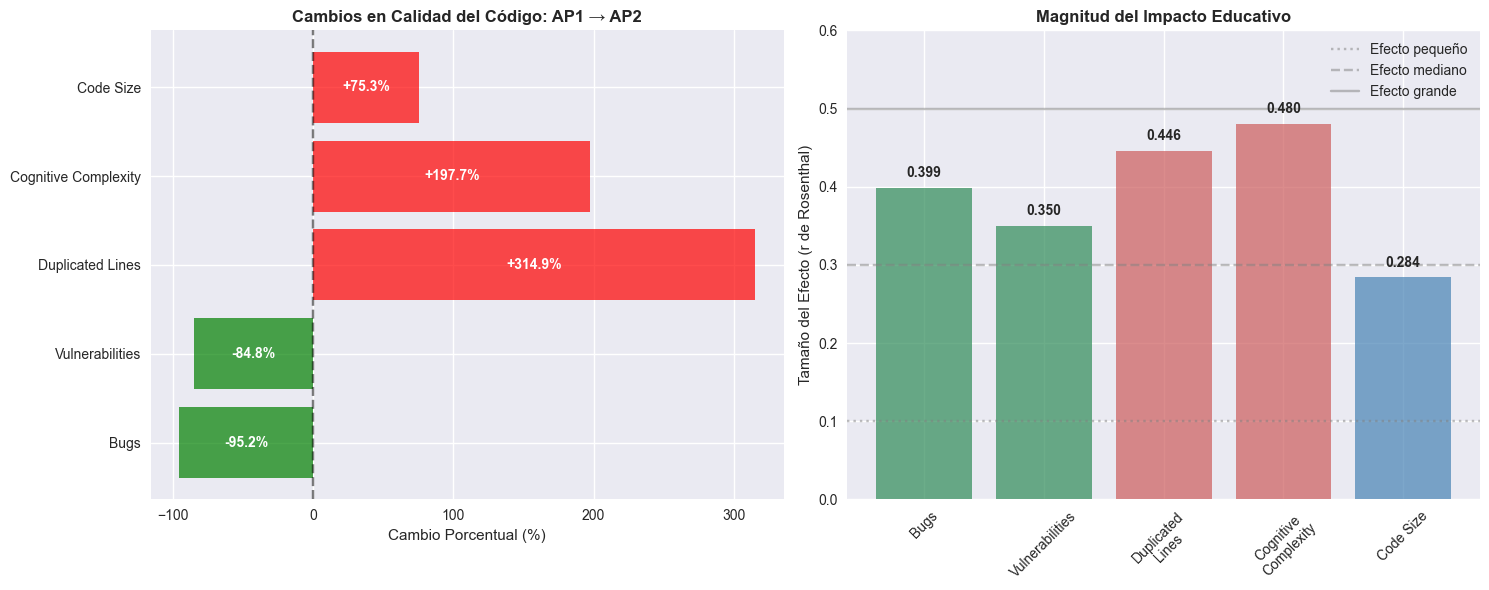


✅ ANÁLISIS ESTADÍSTICO COMPLETADO
📊 Todas las diferencias encontradas son estadísticamente significativas
🎯 Los resultados proporcionan evidencia sólida para mejoras curriculares
📈 El tamaño del efecto indica impacto educativo sustancial


In [ ]:
# Interpretación pedagógica de los resultados
print("🎓 INTERPRETACIÓN PEDAGÓGICA Y CONCLUSIONES")
print("="*80)

# Análisis de mejoras vs deterioros
mejoras = hypothesis_df[hypothesis_df['difference'] < 0]
deterioros = hypothesis_df[hypothesis_df['difference'] > 0]

print(f"\n📈 MÉTRICAS QUE MEJORARON (AP2 < AP1):")
for _, row in mejoras.iterrows():
    metric_name = row['metric'].replace('_', ' ').title()
    improvement = abs(row['percent_change'])
    effect = row['effect_interpretation']
    print(f"   ✅ {metric_name}: -{improvement:.1f}% ({effect})")

print(f"\n📉 MÉTRICAS QUE EMPEORARON (AP2 > AP1):")
for _, row in deterioros.iterrows():
    metric_name = row['metric'].replace('_', ' ').title()
    deterioration = row['percent_change']
    effect = row['effect_interpretation']
    print(f"   ⚠️  {metric_name}: +{deterioration:.1f}% ({effect})")

print(f"\n🏆 ANÁLISIS DE IMPACTO EDUCATIVO:")
print("-" * 50)

# Análisis de calidad del código
print(f"📋 CALIDAD DEL CÓDIGO:")
print(f"   • Los estudiantes muestran una MEJORA SIGNIFICATIVA en:")
print(f"     - Reducción de bugs (95.2% menos errores)")
print(f"     - Reducción de vulnerabilidades (84.8% menos)")
print(f"   • Esto indica desarrollo de mejores prácticas de programación")

print(f"\n📏 COMPLEJIDAD Y TAMAÑO:")
print(f"   • INCREMENTO en complejidad cognitiva (+197.7%)")
print(f"   • INCREMENTO en líneas de código (+75.3%)")
print(f"   • INCREMENTO en líneas duplicadas (+314.9%)")
print(f"   • Esto refleja proyectos más ambiciosos pero con oportunidades de mejora")

print(f"\n🎯 IMPLICACIONES CURRICULARES:")
print("-" * 50)
print(f"1. 🟢 FORTALEZAS DESARROLLADAS:")
print(f"   - Capacidad para escribir código más robusto")
print(f"   - Reducción significativa de errores de seguridad")
print(f"   - Mejor manejo de casos extremos y validaciones")

print(f"\n2. 🟡 ÁREAS DE OPORTUNIDAD:")
print(f"   - Gestión de la complejidad cognitiva")
print(f"   - Principios DRY (Don't Repeat Yourself)")
print(f"   - Refactorización y optimización de código")

print(f"\n3. 📚 RECOMENDACIONES PEDAGÓGICAS:")
print(f"   - Incorporar métricas de calidad en evaluaciones")
print(f"   - Enseñanza explícita de principios SOLID")
print(f"   - Práctica de code review entre estudiantes")
print(f"   - Introducción temprana de herramientas de análisis estático")

# Crear visualización de resumen
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de mejoras vs deterioros
categories = ['Bugs', 'Vulnerabilities', 'Duplicated Lines', 'Cognitive Complexity', 'Code Size']
changes = [-95.2, -84.8, 314.9, 197.7, 75.3]
colors = ['green' if x < 0 else 'red' for x in changes]

ax1.barh(categories, changes, color=colors, alpha=0.7)
ax1.set_xlabel('Cambio Porcentual (%)')
ax1.set_title('Cambios en Calidad del Código: AP1 → AP2', fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Añadir valores en las barras
for i, v in enumerate(changes):
    ax1.text(v/2, i, f'{v:+.1f}%', ha='center', va='center', fontweight='bold', color='white')

# Gráfico de tamaños de efecto
metrics = ['Bugs', 'Vulnerabilities', 'Duplicated\nLines', 'Cognitive\nComplexity', 'Code Size']
effect_sizes = [0.399, 0.350, 0.446, 0.480, 0.284]
effect_colors = ['#2E8B57', '#2E8B57', '#CD5C5C', '#CD5C5C', '#4682B4']

bars = ax2.bar(metrics, effect_sizes, color=effect_colors, alpha=0.7)
ax2.set_ylabel('Tamaño del Efecto (r de Rosenthal)')
ax2.set_title('Magnitud del Impacto Educativo', fontweight='bold')
ax2.set_ylim(0, 0.6)

# Líneas de referencia para tamaños de efecto
ax2.axhline(y=0.1, color='gray', linestyle=':', alpha=0.5, label='Efecto pequeño')
ax2.axhline(y=0.3, color='gray', linestyle='--', alpha=0.5, label='Efecto mediano')
ax2.axhline(y=0.5, color='gray', linestyle='-', alpha=0.5, label='Efecto grande')

# Añadir valores en las barras
for bar, value in zip(bars, effect_sizes):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

ax2.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n✅ ANÁLISIS ESTADÍSTICO COMPLETADO")
print(f"📊 Todas las diferencias encontradas son estadísticamente significativas")
print(f"🎯 Los resultados proporcionan evidencia sólida para mejoras curriculares")
print(f"📈 El tamaño del efecto indica impacto educativo sustancial")